<a href="https://colab.research.google.com/github/Kekeyydn/AHCDiabetsDMDW/blob/main/UASMesinLearning_Kel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agglomerative Hierarchical Clustering

Mounted at /content/drive
        Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0                        Yes  
1                         No  
2                        Yes  
3                    

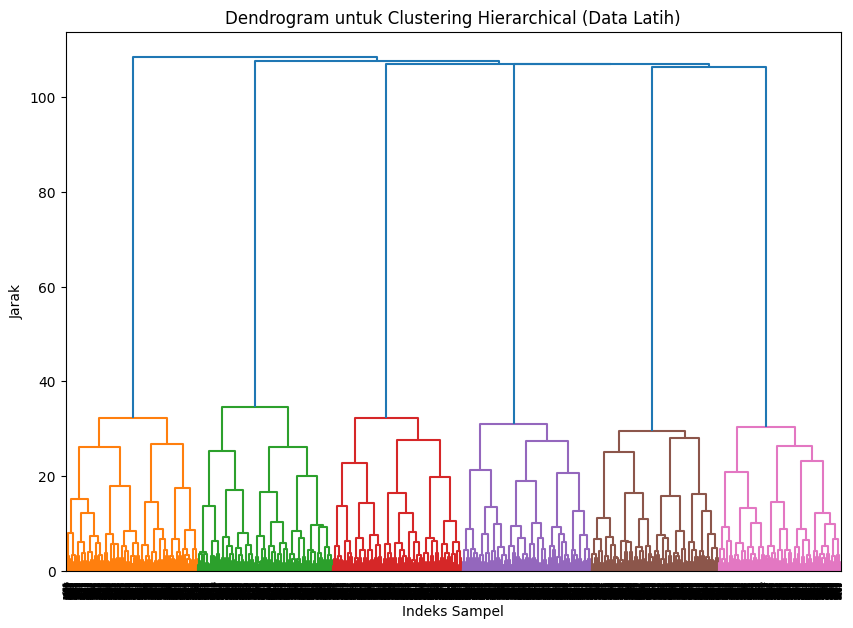

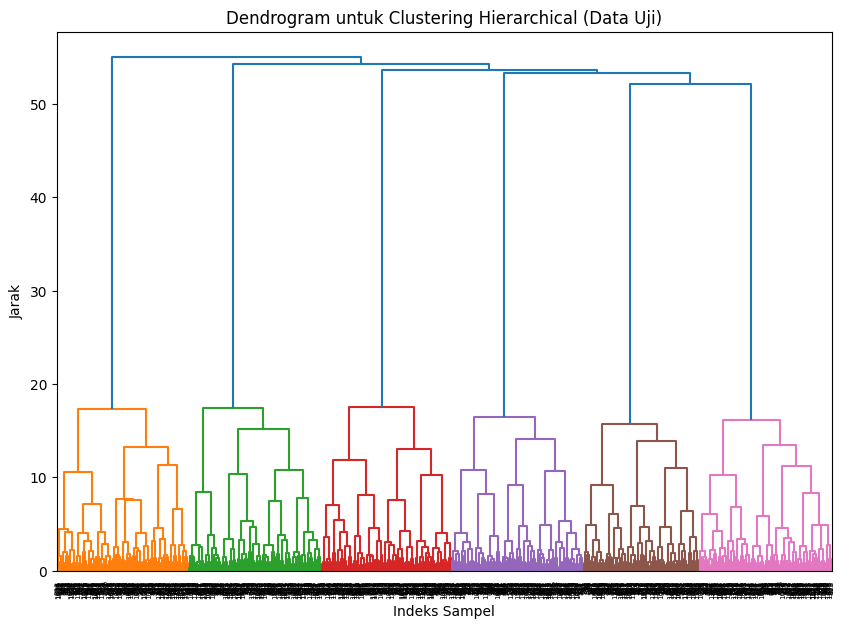

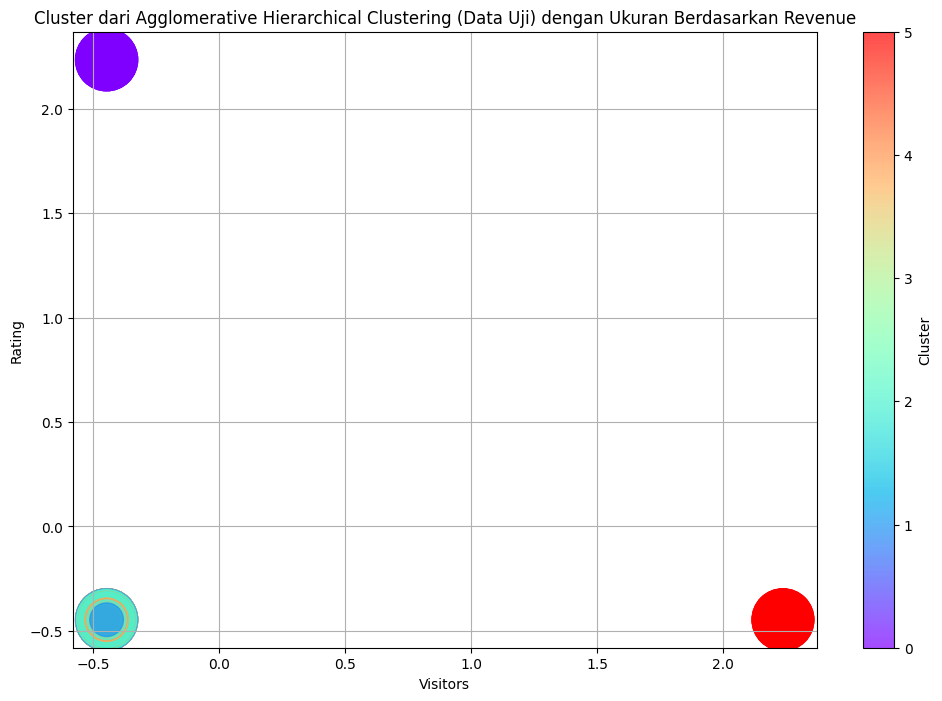

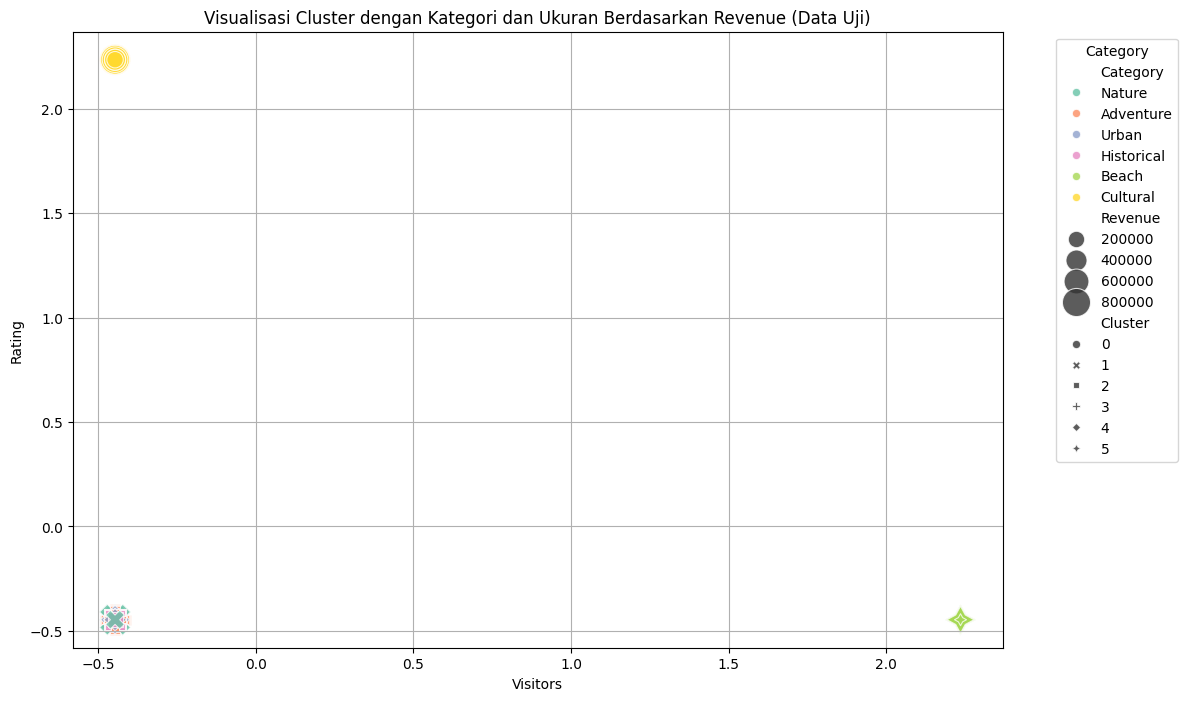


Jumlah data dalam tiap cluster (Data Uji):
Cluster  Category  
0        Cultural      201
1        Nature        204
2        Historical    206
3        Adventure     205
4        Urban         203
5        Beach         179
Name: count, dtype: int64

Rata-rata Revenue di tiap Cluster (Data Uji):
Cluster
0    541331.860348
1    491970.900686
2    478215.207670
3    476730.490537
4    493492.222956
5    515380.346425
Name: Revenue, dtype: float64


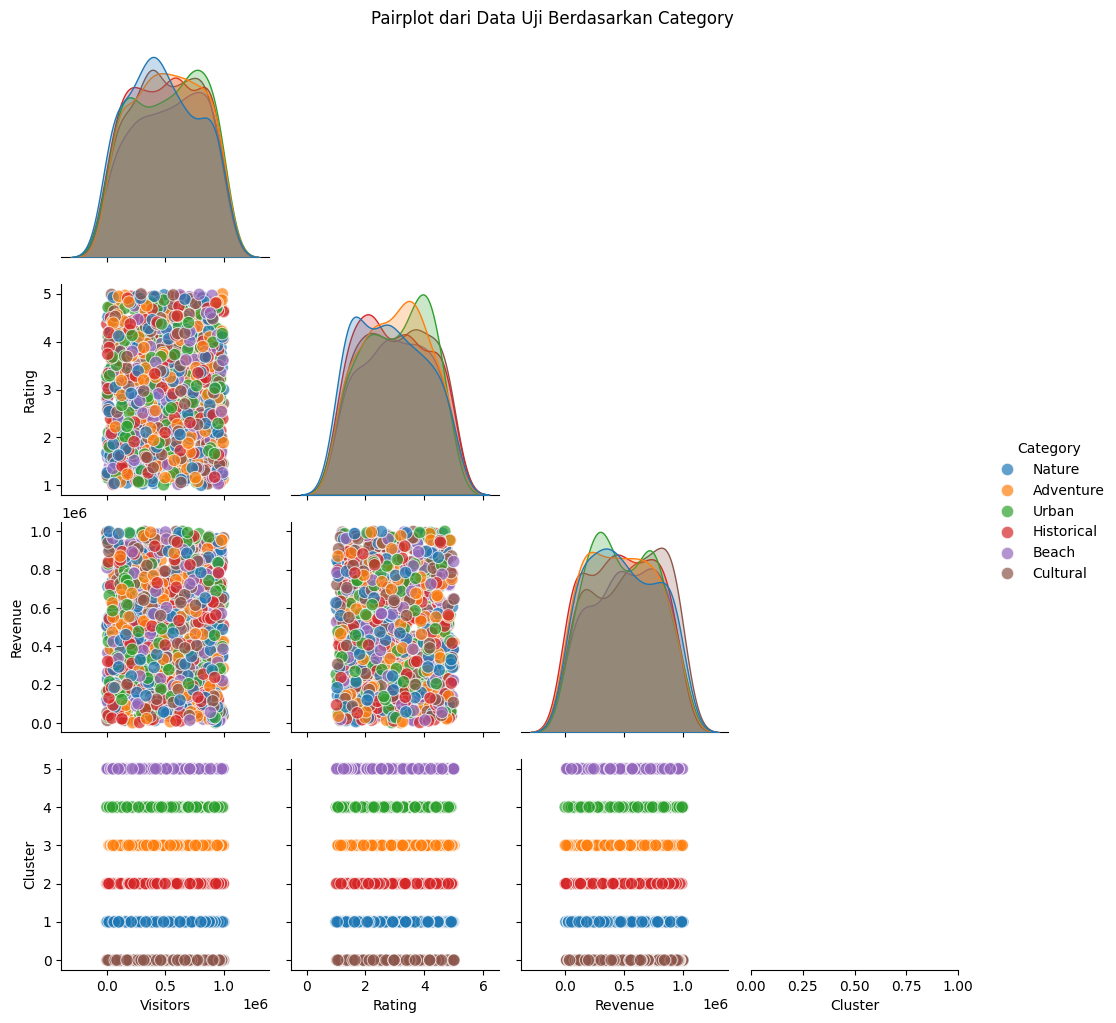

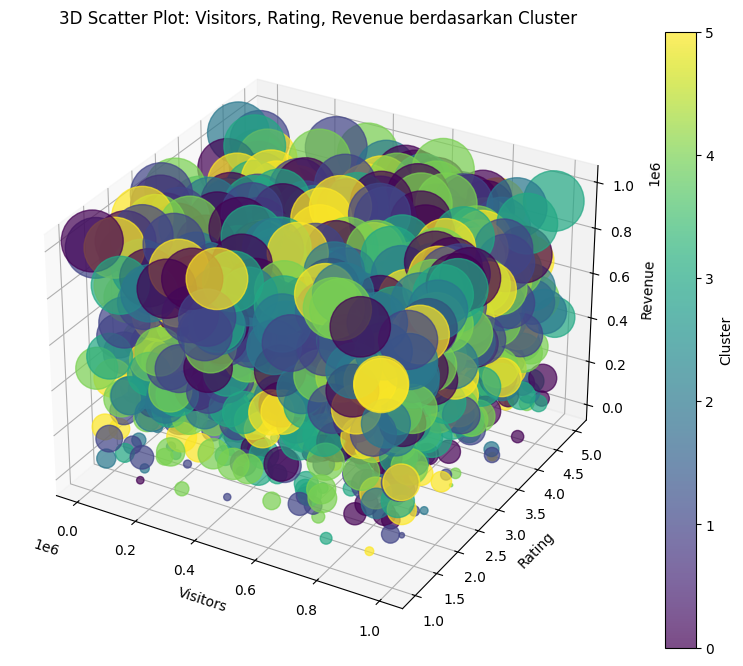

Hasil clustering untuk data training telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/tourism_dataset_train_with_clusters.csv
Hasil clustering untuk data testing telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/tourism_dataset_test_with_clusters.csv

Ringkasan Statistik untuk Setiap Cluster dengan Kategori:
   Cluster  Number of Countries  Average Visitors  Average Rating  \
0        0                  201     511423.368159        3.065721   
1        1                  204     479425.465686        2.843578   
2        2                  206     506245.067961        2.955922   
3        3                  205     520220.331707        3.007463   
4        4                  203     524164.073892        3.038768   
5        5                  179     528420.860335        3.022123   

   Average Revenue  Adventure  Beach  Cultural  Historical  Nature  Urban  
0    541331.860348          0      0       201           0       0      0  
1    491970.900686          0  

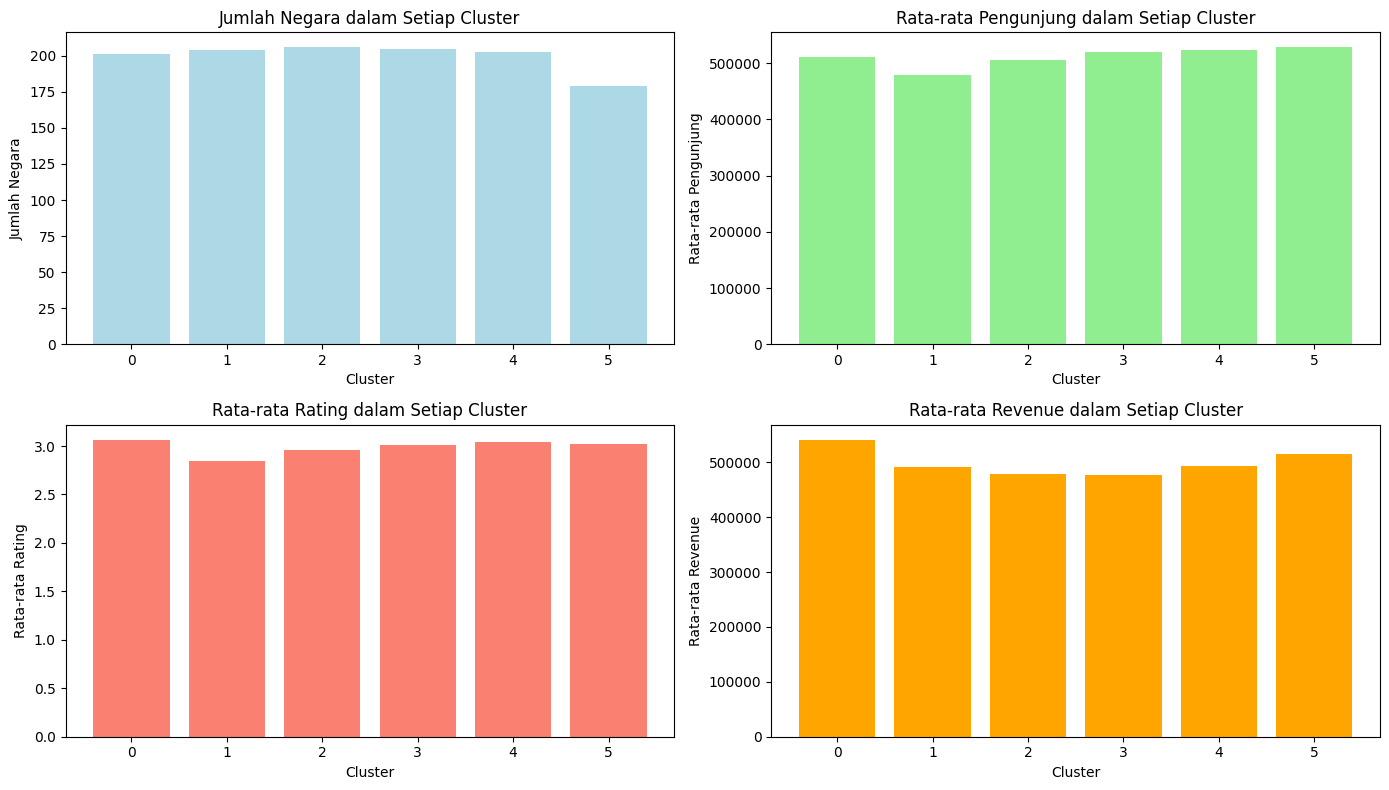

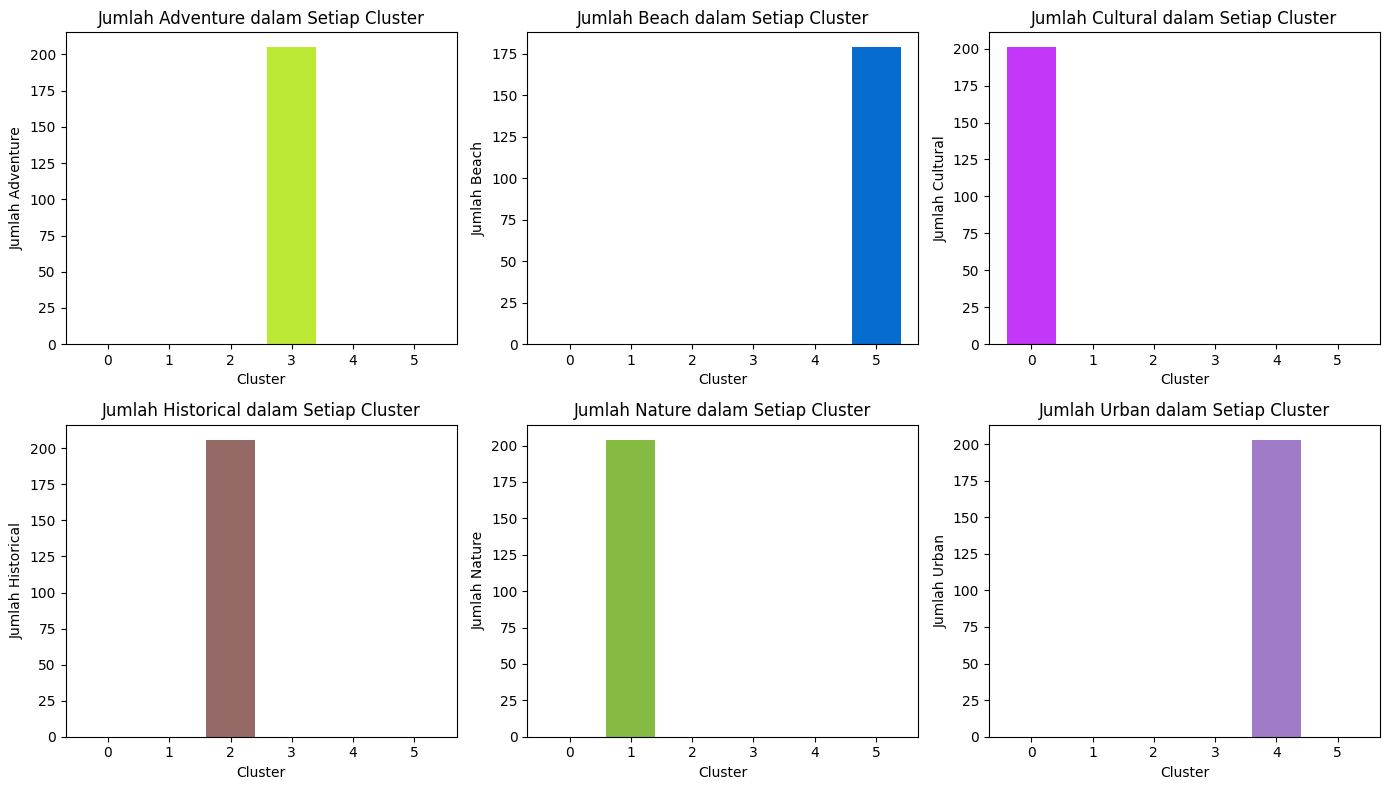

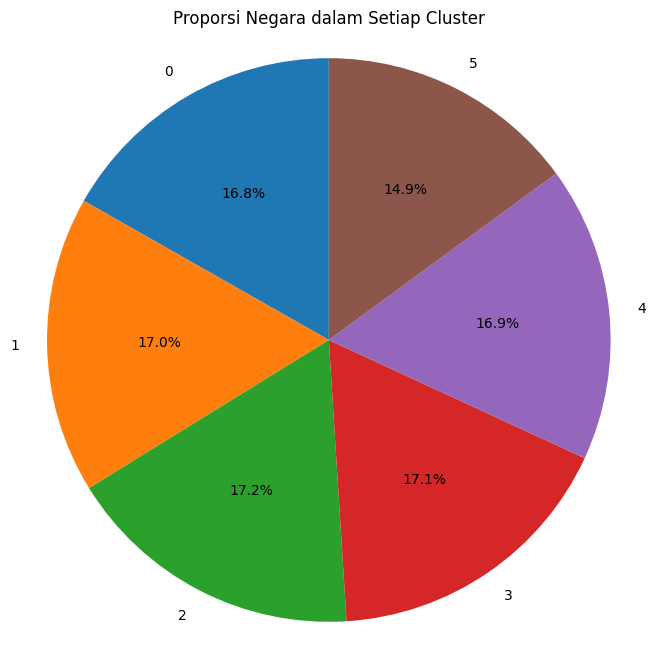


Negara dengan Rata-rata Pengunjung Tertinggi per Cluster:
    Cluster    Country    Category       Visitors
3         0      Egypt    Cultural  571252.000000
12        1      India      Nature  541376.107143
15        2     Brazil  Historical  576288.466667
23        3      China   Adventure  586861.444444
28        4  Australia       Urban  595504.466667
36        5     Brazil       Beach  568780.162162


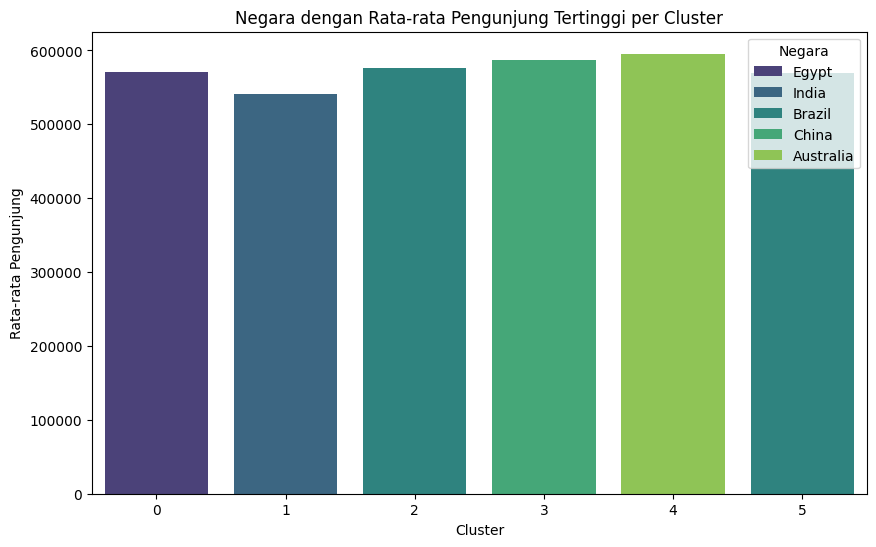


Negara dengan Rata-rata Rating Tertinggi per Cluster:
    Cluster    Country    Category    Rating
4         0     France    Cultural  3.284643
11        1     France      Nature  3.146286
14        2  Australia  Historical  3.230357
26        3      India   Adventure  3.232333
32        4     France       Urban  3.300513
41        5        USA       Beach  3.246000


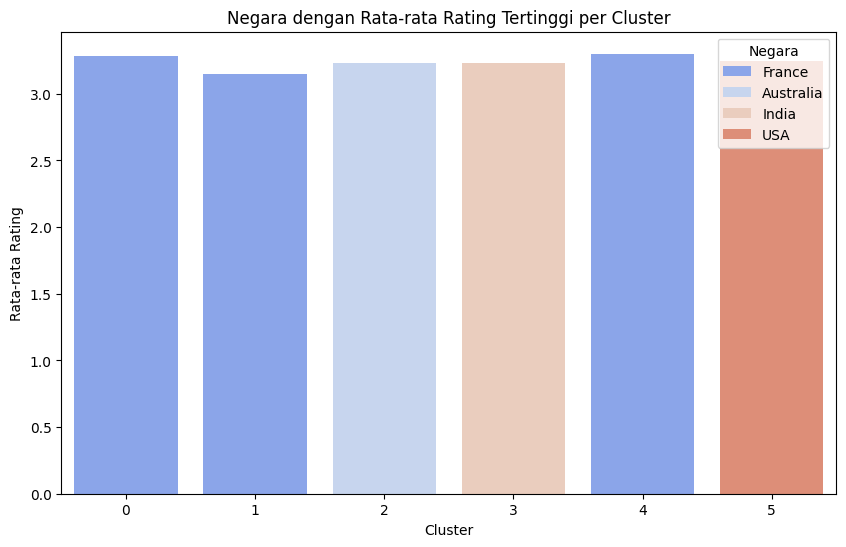


Negara dengan Rata-rata Revenue Tertinggi per Cluster:
    Cluster Country    Category        Revenue
1         0  Brazil    Cultural  615718.185417
8         1  Brazil      Nature  620994.447917
17        2   Egypt  Historical  550320.990938
24        3   Egypt   Adventure  569817.507857
31        4   Egypt       Urban  525919.092500
40        5   India       Beach  580303.066552


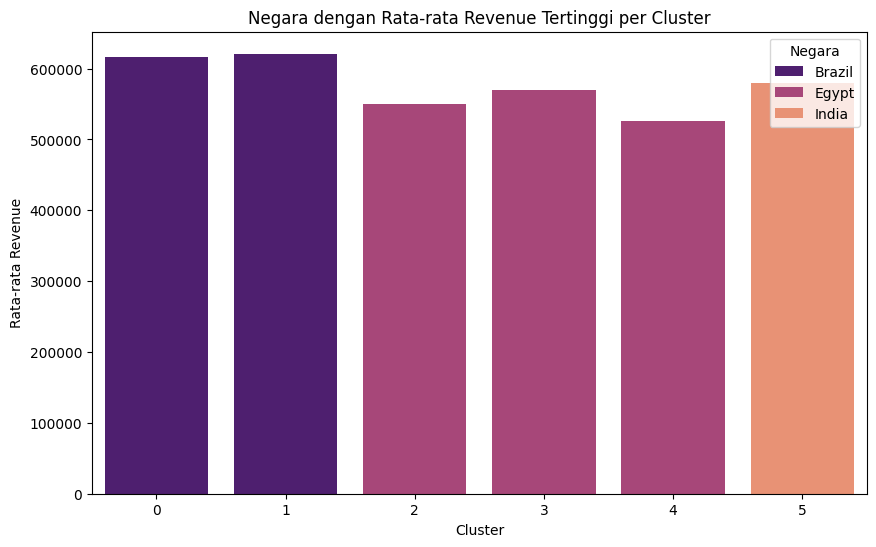

Hasil untuk Cluster 0 telah disimpan dalam file: cluster_0_analysis.csv
Hasil untuk Cluster 1 telah disimpan dalam file: cluster_1_analysis.csv
Hasil untuk Cluster 2 telah disimpan dalam file: cluster_2_analysis.csv
Hasil untuk Cluster 3 telah disimpan dalam file: cluster_3_analysis.csv
Hasil untuk Cluster 4 telah disimpan dalam file: cluster_4_analysis.csv
Hasil untuk Cluster 5 telah disimpan dalam file: cluster_5_analysis.csv

Negara-Negara untuk Cluster 0:
     Cluster    Country  Category  Visitors  Rating    Revenue
0          0  Australia  Cultural    999664    2.71  966022.60
1          0     Brazil  Cultural    998327    4.66  203004.77
2          0        USA  Cultural    995896    4.06   39210.52
3          0     France  Cultural    988220    4.12  837986.44
4          0      Egypt  Cultural    983920    1.99  648172.68
..       ...        ...       ...       ...     ...        ...
196        0      Egypt  Cultural     19074    3.99  894713.72
197        0     Brazil  Cultura

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import OneHotEncoder

# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke direktori dataset
dataset_dir = '/content/drive/MyDrive/UTSDATASET/tourism_dataset-2.csv'

# memuat dataset
df = pd.read_csv(dataset_dir)
print(df)

# Data Cleaning: menghapus nilai yang hilang - jika ada
df_selected = df[['Category','Country', 'Visitors', 'Rating', 'Revenue']]
df_selected.dropna(inplace=True)
print(df_selected)

# konversi kolom yang terpilih ke numerik - jika belum
df_selected['Visitors'] = pd.to_numeric(df_selected['Visitors'], errors='coerce')
df_selected['Rating'] = pd.to_numeric(df_selected['Rating'], errors='coerce')
df_selected['Revenue'] = pd.to_numeric(df_selected['Revenue'], errors='coerce')

# Inisialisasi OneHotEncoder
onehot = OneHotEncoder()

# Encode kolom 'Category'
category_encoded = onehot.fit_transform(df_selected[['Category']]).toarray()

# Gabungkan hasil One-Hot Encoding dengan fitur lainnya
X = np.concatenate([category_encoded, df_selected[['Visitors', 'Rating', 'Revenue']].values], axis=1)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pisah dataset menjadi data latih dan uji
X_train, X_test, df_train, df_test = train_test_split(X_scaled, df_selected, test_size=0.2, random_state=3)

# Inisialisasi Agglomerative Clustering untuk data latih
n_clusters = 6
ahc_train = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Melatih model pada data latih
cluster_labels_train = ahc_train.fit_predict(X_train)

# Menambahkan label cluster ke dataframe latih
df_train['Cluster'] = cluster_labels_train

# Visualisasi Dendrogram untuk data latih
plt.figure(figsize=(10, 7))
dendrogram_train = sch.dendrogram(sch.linkage(X_train, method='ward'))
plt.title('Dendrogram untuk Clustering Hierarchical (Data Latih)')
plt.xlabel('Indeks Sampel')
plt.ylabel('Jarak')
plt.show()

# Melatih model pada data uji
cluster_labels_test = ahc_train.fit_predict(X_test)

# Visualisasi Dendrogram untuk data uji
plt.figure(figsize=(10, 7))
dendrogram_test = sch.dendrogram(sch.linkage(X_test, method='ward'))
plt.title('Dendrogram untuk Clustering Hierarchical (Data Uji)')
plt.xlabel('Indeks Sampel')
plt.ylabel('Jarak')
plt.show()

# Menambahkan label cluster ke dataframe uji
df_test['Cluster'] = cluster_labels_test

# Visualisasi Cluster untuk data uji (Bubble plot dengan Revenue sebagai ukuran)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_test[:, 1], X_test[:, 2], c=cluster_labels_test, cmap='rainbow', s=(df_test['Revenue'] / 500), alpha=0.7)  # Ukuran diperbesar
plt.title('Cluster dari Agglomerative Hierarchical Clustering (Data Uji) dengan Ukuran Berdasarkan Revenue')
plt.xlabel('Visitors')
plt.ylabel('Rating')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)  # Tambahkan grid agar lebih jelas
plt.show()

# Visualisasi data uji berdasarkan cluster dan kategori dengan ukuran berdasarkan Revenue
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_test[:, 1], y=X_test[:, 2], hue=df_test['Category'], style=df_test['Cluster'],
                size=df_test['Revenue'], sizes=(50, 500), palette='Set2', alpha=0.8)  # Ukuran diperbesar
plt.title('Visualisasi Cluster dengan Kategori dan Ukuran Berdasarkan Revenue (Data Uji)')
plt.xlabel('Visitors')
plt.ylabel('Rating')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Tambahkan grid
plt.show()

# Menampilkan jumlah data dalam setiap cluster di data uji
print("\nJumlah data dalam tiap cluster (Data Uji):")
print(df_test[['Cluster', 'Category']].value_counts().sort_index())

# Menampilkan rata-rata revenue per cluster di data uji
average_revenue_per_cluster = df_test.groupby('Cluster')['Revenue'].mean()
print("\nRata-rata Revenue di tiap Cluster (Data Uji):")
print(average_revenue_per_cluster)

import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot berdasarkan kategori ( catatan menjelaskan grafiknya)
sns.pairplot(df_test, hue='Category', diag_kind='kde', corner=True, plot_kws={'alpha': 0.7, 's': 80})
plt.suptitle('Pairplot dari Data Uji Berdasarkan Category', y=1.02)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot berdasarkan Visitors, Rating, dan Revenue
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Menggunakan cluster sebagai warna dan Revenue sebagai ukuran titik
scatter = ax.scatter(df_test['Visitors'], df_test['Rating'], df_test['Revenue'],
                     c=cluster_labels_test, cmap='viridis', s=df_test['Revenue'] / 500, alpha=0.7)

ax.set_title('3D Scatter Plot: Visitors, Rating, Revenue berdasarkan Cluster')
ax.set_xlabel('Visitors')
ax.set_ylabel('Rating')
ax.set_zlabel('Revenue')

# Tambahkan colorbar
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

# Menyimpan dataframe training dengan cluster ke dalam file CSV
train_output_path = '/content/drive/MyDrive/UTSDATASET/tourism_dataset_train_with_clusters.csv'
df_train.to_csv(train_output_path, index=False)

print(f'Hasil clustering untuk data training telah disimpan dalam file: {train_output_path}')

# Menyimpan dataframe testing dengan cluster ke dalam file CSV
test_output_path = '/content/drive/MyDrive/UTSDATASET/tourism_dataset_test_with_clusters.csv'
df_test.to_csv(test_output_path, index=False)

print(f'Hasil clustering untuk data testing telah disimpan dalam file: {test_output_path}')

# Menghitung statistik untuk setiap cluster, termasuk Category
cluster_summary = df_test.groupby('Cluster').agg({
    'Country': 'count',  # Jumlah negara dalam setiap cluster
    'Visitors': 'mean',  # Rata-rata pengunjung
    'Rating': 'mean',    # Rata-rata rating
    'Revenue': 'mean'    # Rata-rata revenue
}).reset_index()

# Menambahkan analisis jumlah kategori dalam setiap cluster
category_summary = df_test.groupby(['Cluster', 'Category']).size().unstack(fill_value=0)

# Gabungkan kedua summary: cluster_summary dan category_summary
cluster_summary = pd.concat([cluster_summary, category_summary], axis=1)

# Menamai kolom
cluster_summary.columns = ['Cluster', 'Number of Countries', 'Average Visitors', 'Average Rating', 'Average Revenue'] + list(category_summary.columns)

# Menampilkan ringkasan cluster
print("\nRingkasan Statistik untuk Setiap Cluster dengan Kategori:")
print(cluster_summary)

# Visualisasi ringkasan statistik dengan bar chart
plt.figure(figsize=(14, 8))

# Bar chart untuk jumlah negara
plt.subplot(2, 2, 1)
plt.bar(cluster_summary['Cluster'], cluster_summary['Number of Countries'], color='lightblue')
plt.title('Jumlah Negara dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Negara')

# Bar chart untuk rata-rata pengunjung
plt.subplot(2, 2, 2)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Visitors'], color='lightgreen')
plt.title('Rata-rata Pengunjung dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pengunjung')

# Bar chart untuk rata-rata rating
plt.subplot(2, 2, 3)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Rating'], color='salmon')
plt.title('Rata-rata Rating dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Rating')

# Bar chart untuk rata-rata revenue
plt.subplot(2, 2, 4)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Revenue'], color='orange')
plt.title('Rata-rata Revenue dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Revenue')

plt.tight_layout()
plt.show()

# Visualisasi proporsi kategori dalam setiap cluster menggunakan bar plot
plt.figure(figsize=(14, 8))

# Bar plot untuk setiap kategori dalam setiap cluster
for i, category in enumerate(category_summary.columns, start=1):
    plt.subplot(2, 3, i)
    plt.bar(cluster_summary['Cluster'], cluster_summary[category], color=np.random.rand(3,))
    plt.title(f'Jumlah {category} dalam Setiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Jumlah {category}')

plt.tight_layout()
plt.show()

# Visualisasi dalam bentuk pie chart untuk jumlah negara di setiap cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_summary['Number of Countries'], labels=cluster_summary['Cluster'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Negara dalam Setiap Cluster')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

# Menampilkan negara-negara dalam setiap cluster dalam bentuk tabel
countries_per_cluster = {
    f'Cluster {cluster}': df_test[df_test['Cluster'] == cluster][['Country', 'Category']].apply(
        lambda x: f"{x['Country']} ({x['Category']})", axis=1).tolist()
    for cluster in range(n_clusters)
}

countries_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in countries_per_cluster.items()]))

# Menghitung rata-rata pengunjung untuk setiap negara dalam cluster
visitors_per_country = df_test.groupby(['Cluster', 'Country', 'Category'])['Visitors'].mean().reset_index()

# Mendapatkan negara dengan rata-rata pengunjung tertinggi per cluster
top_countries = visitors_per_country.loc[visitors_per_country.groupby('Cluster')['Visitors'].idxmax()]

# Menampilkan negara dengan rata-rata pengunjung tertinggi di setiap cluster
print("\nNegara dengan Rata-rata Pengunjung Tertinggi per Cluster:")
print(top_countries)

# Visualisasi Negara dengan Rata-rata Pengunjung Tertinggi di Setiap Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Cluster', y='Visitors', hue='Country', palette='viridis')
plt.title('Negara dengan Rata-rata Pengunjung Tertinggi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pengunjung')
plt.legend(title='Negara')
plt.show()

# Menampilkan negara dengan rata-rata rating tertinggi per cluster
rating_per_country = df_test.groupby(['Cluster', 'Country', 'Category'])['Rating'].mean().reset_index()

# Mendapatkan negara dengan rata-rata rating tertinggi per cluster
top_ratings = rating_per_country.loc[rating_per_country.groupby('Cluster')['Rating'].idxmax()]

# Menampilkan negara dengan rata-rata rating tertinggi di setiap cluster
print("\nNegara dengan Rata-rata Rating Tertinggi per Cluster:")
print(top_ratings)

# Visualisasi Negara dengan Rata-rata Rating Tertinggi di Setiap Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ratings, x='Cluster', y='Rating', hue='Country', palette='coolwarm')
plt.title('Negara dengan Rata-rata Rating Tertinggi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Rating')
plt.legend(title='Negara')
plt.show()

# Menampilkan negara dengan rata-rata revenue tertinggi per cluster
revenue_per_country = df_test.groupby(['Cluster', 'Country', 'Category'])['Revenue'].mean().reset_index()

# Mendapatkan negara dengan rata-rata revenue tertinggi per cluster
top_revenues = revenue_per_country.loc[revenue_per_country.groupby('Cluster')['Revenue'].idxmax()]

# Menampilkan negara dengan rata-rata revenue tertinggi di setiap cluster
print("\nNegara dengan Rata-rata Revenue Tertinggi per Cluster:")
print(top_revenues)

# Visualisasi Negara dengan Rata-rata Revenue Tertinggi di Setiap Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=top_revenues, x='Cluster', y='Revenue', hue='Country', palette='magma')
plt.title('Negara dengan Rata-rata Revenue Tertinggi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Revenue')
plt.legend(title='Negara')
plt.show()

# Menampilkan negara-negara berdasarkan Visitors, Rating, Revenue, dan Category
cluster_analysis = df_test.groupby('Cluster')[['Country', 'Category', 'Visitors', 'Rating', 'Revenue']].apply(
    lambda x: x.sort_values(['Visitors', 'Revenue', 'Rating'], ascending=False)
).reset_index(drop=False)  # Menjaga index level dan menambahkan level sebagai kolom

# Menghapus kolom level_1
cluster_analysis = cluster_analysis.drop(columns=['level_1'])

# Menyimpan hasil analisis per cluster ke dalam file CSV terpisah
for cluster in cluster_analysis['Cluster'].unique():
    cluster_data = cluster_analysis[cluster_analysis['Cluster'] == cluster].drop(columns='Cluster')
    cluster_data.to_csv(f'/content/drive/MyDrive/UTSDATASET/cluster_{cluster}_analysis.csv', index=False)
    print(f"Hasil untuk Cluster {cluster} telah disimpan dalam file: cluster_{cluster}_analysis.csv")

# Menampilkan hasil analisis per cluster
for cluster in cluster_analysis['Cluster'].unique():
    print(f"\nNegara-Negara untuk Cluster {cluster}:")
    print(cluster_analysis[cluster_analysis['Cluster'] == cluster])

# Evaluasi Silhouette Score untuk data training
silhouette_train = silhouette_score(X_train, cluster_labels_train)
print(f"Silhouette Score untuk Training Data: {silhouette_train:.4f}")

# Evaluasi Silhouette Score untuk data testing
silhouette_test = silhouette_score(X_test, cluster_labels_test)
print(f"Silhouette Score untuk Testing Data: {silhouette_test:.4f}")

Agglomerative Hierarchical Clustering With PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0          

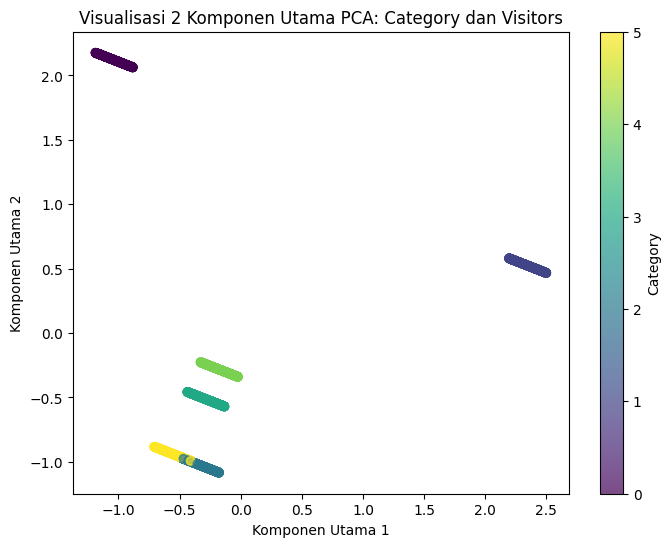

Komponen utama PCA:
[[-0.38802987  0.87858777 -0.11877053 -0.10200043 -0.06090103 -0.20348393
  -0.08883232]
 [ 0.8053317   0.19820868 -0.37986851 -0.18819609 -0.10058987 -0.34817276
   0.03307153]]

Variansi yang dijelaskan oleh setiap komponen:
[0.17547905 0.17278579]


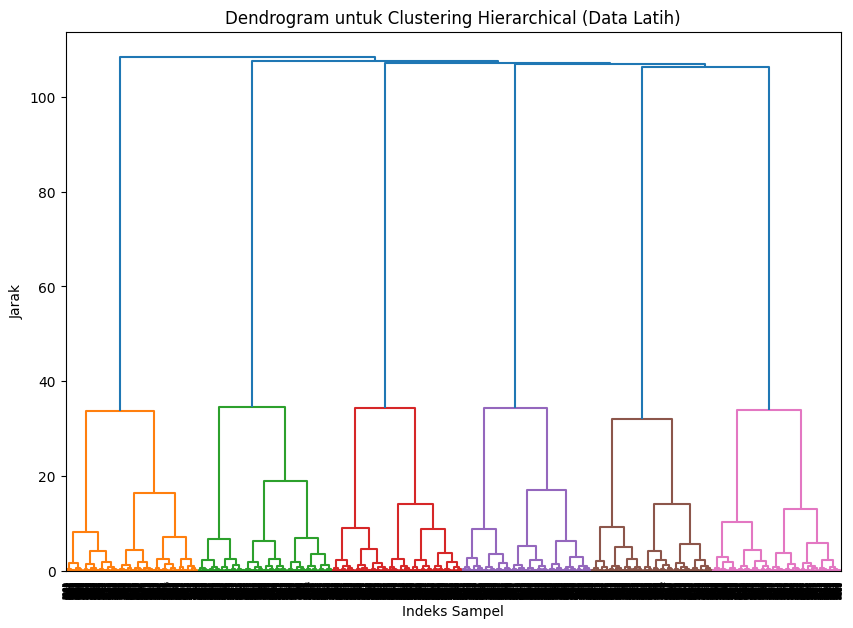

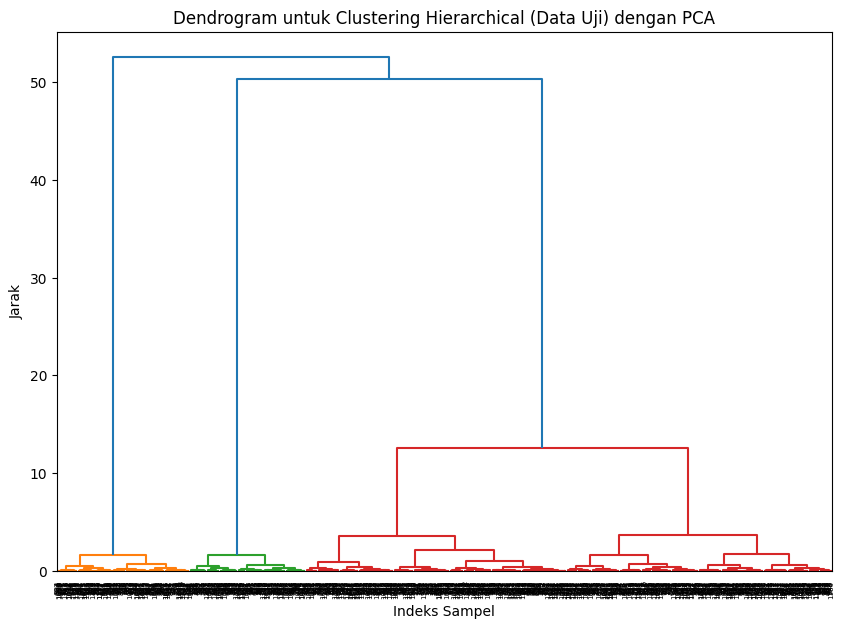


Jumlah data dalam tiap cluster (Data Uji):
Cluster  Category  
0        Cultural       65
         Urban         203
1        Historical    206
2        Beach         179
3        Adventure     205
4        Nature        204
5        Cultural      136
Name: count, dtype: int64


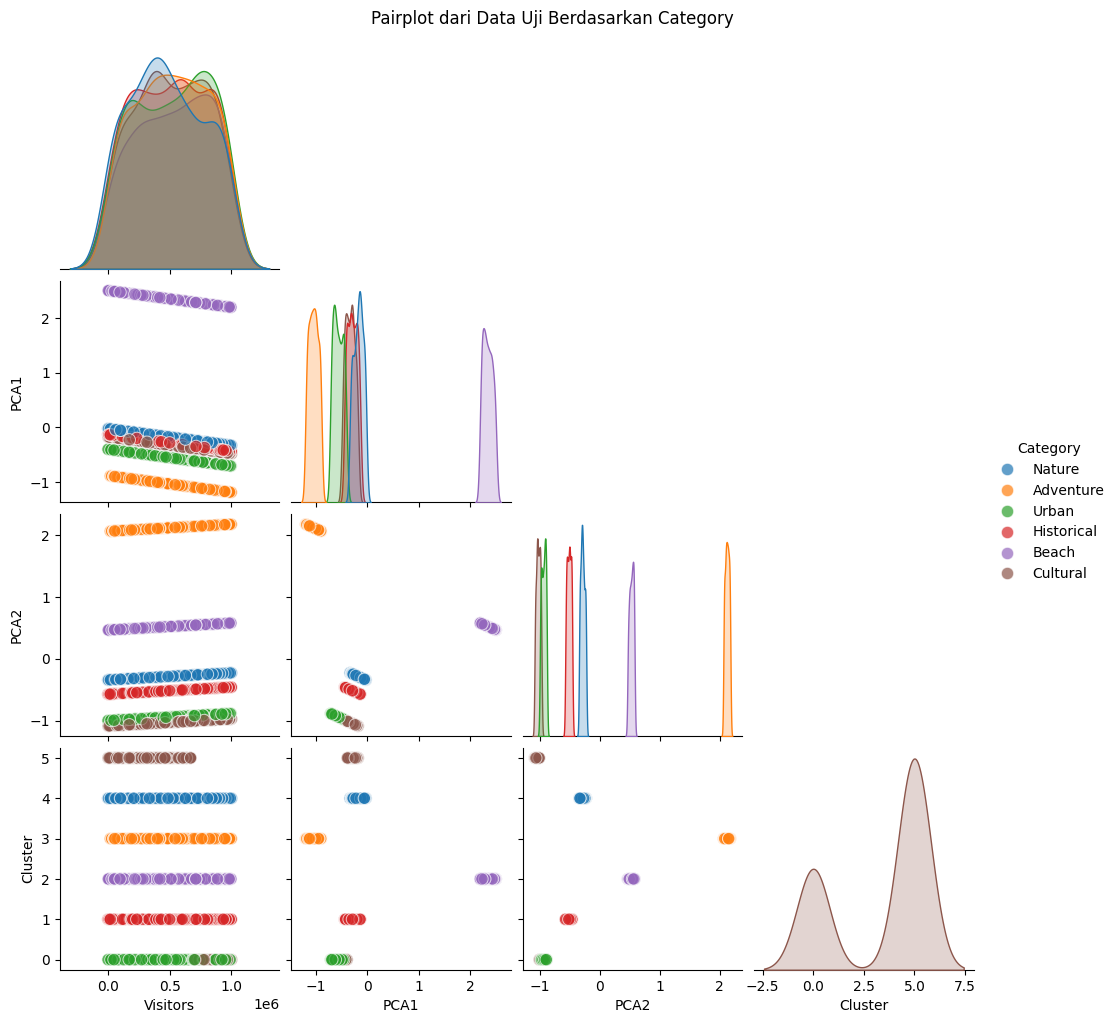

Hasil clustering untuk data training telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/tourism_dataset_train_with_clusters_pca.csv
Hasil clustering untuk data testing telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/tourism_dataset_test_with_clusters_pca.csv

Ringkasan Statistik untuk Setiap Cluster (Category dan Visitors):
   Cluster  Average Visitors  Number of Unique Categories  Adventure  Beach  \
0        0     601426.126866                            2          0      0   
1        1     506245.067961                            1          0      0   
2        2     528420.860335                            1          0    179   
3        3     520220.331707                            1        205      0   
4        4     479425.465686                            1          0      0   
5        5     353082.367647                            1          0      0   

   Cultural  Historical  Nature  Urban  
0        65           0       0    203  
1         0    

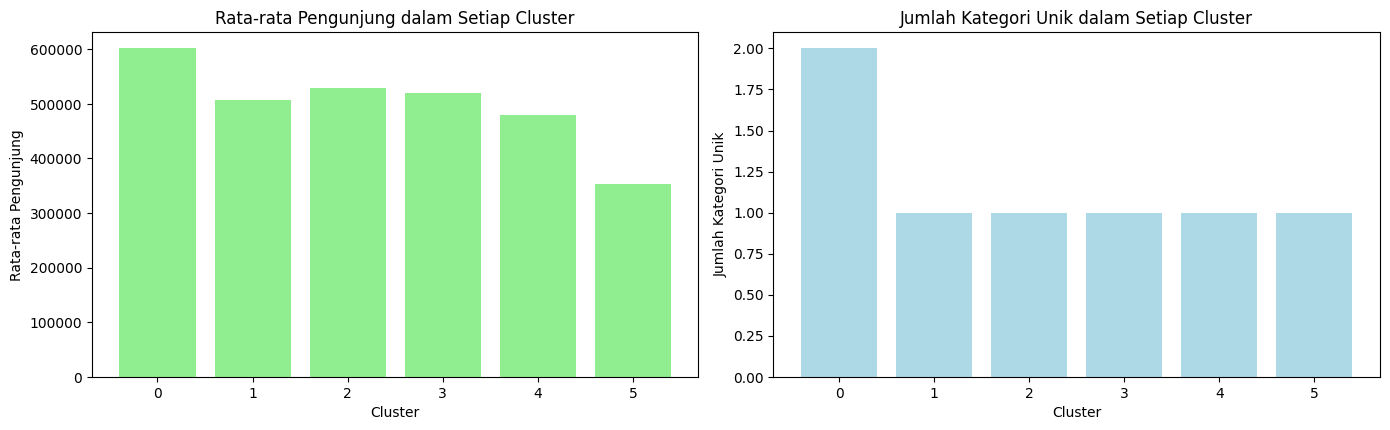

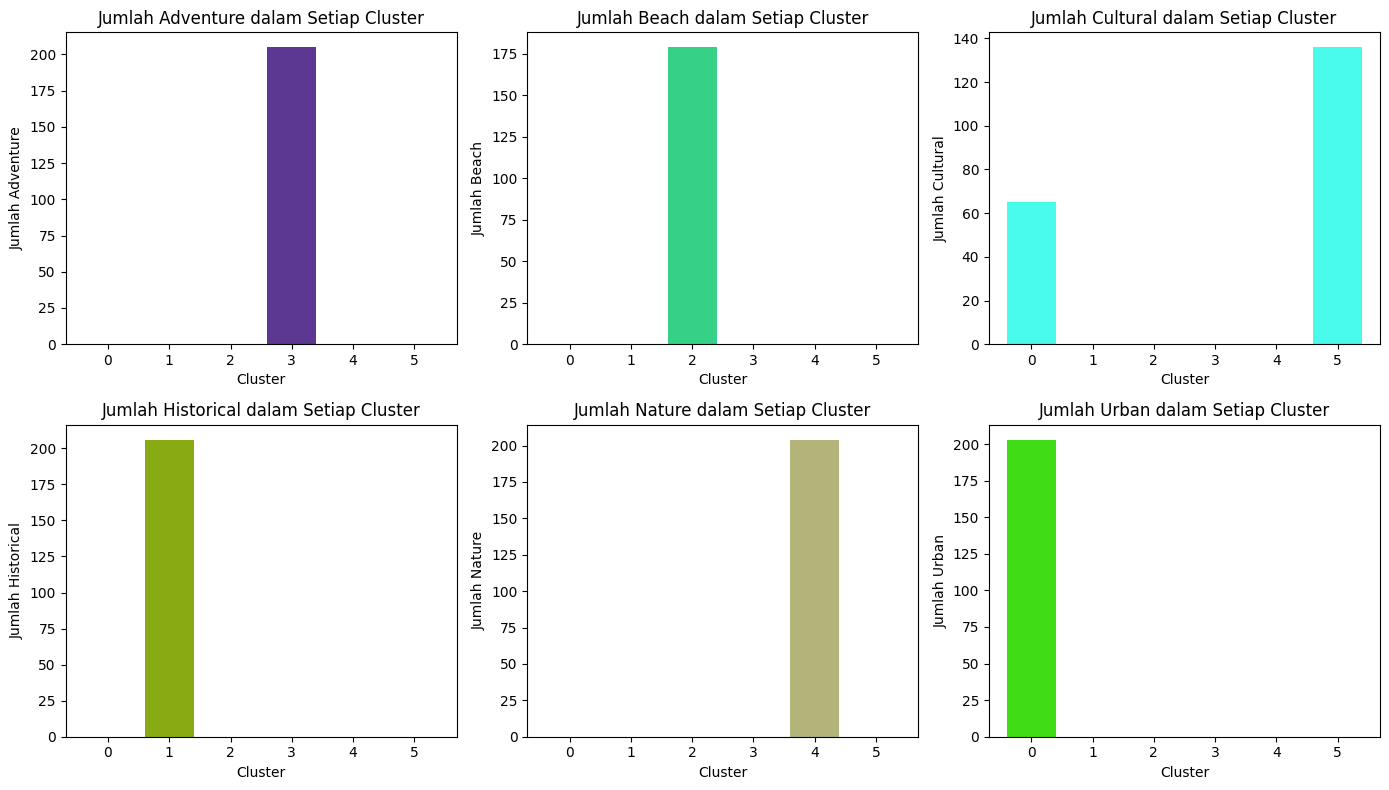

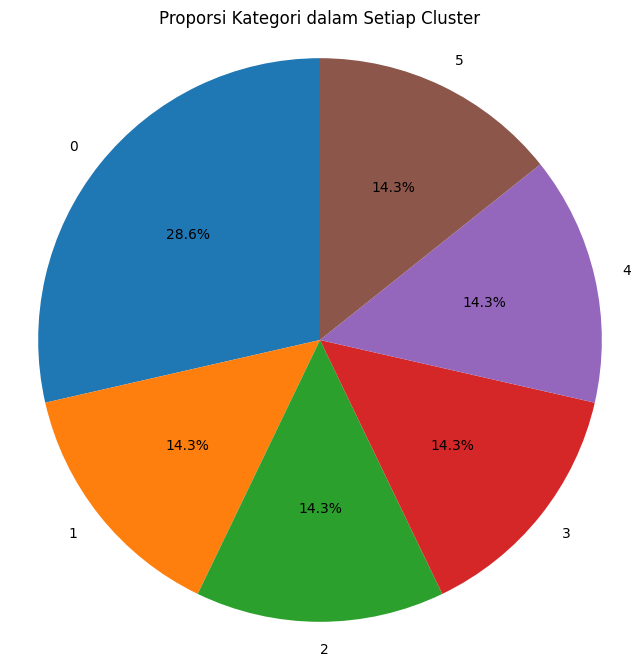

Hasil untuk Cluster 0 telah disimpan dalam file: cluster_0_analysis.csv
Hasil untuk Cluster 1 telah disimpan dalam file: cluster_1_analysis.csv
Hasil untuk Cluster 2 telah disimpan dalam file: cluster_2_analysis.csv
Hasil untuk Cluster 3 telah disimpan dalam file: cluster_3_analysis.csv
Hasil untuk Cluster 4 telah disimpan dalam file: cluster_4_analysis.csv
Hasil untuk Cluster 5 telah disimpan dalam file: cluster_5_analysis.csv

Negara-Negara untuk Cluster 0:
     Cluster    Country  Category  Visitors
0          0  Australia  Cultural    999664
1          0     Brazil  Cultural    998327
2          0        USA  Cultural    995896
3          0  Australia     Urban    995335
4          0     France     Urban    989865
..       ...        ...       ...       ...
263        0      Egypt     Urban     13767
264        0        USA     Urban     11978
265        0     Brazil     Urban     11541
266        0      India     Urban      7085
267        0     France     Urban      1855

[268 ro

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke direktori dataset
dataset_dir = '/content/drive/MyDrive/UTSDATASET/tourism_dataset-2.csv'

# Memuat dataset
df = pd.read_csv(dataset_dir)
print(df)

# Data Cleaning: menghapus nilai yang hilang - jika ada
df_selected = df[['Country','Category', 'Visitors']]
df_selected.dropna(inplace=True)
print(df_selected)

# Konversi kolom yang terpilih ke numerik - jika belum
df_selected['Visitors'] = pd.to_numeric(df_selected['Visitors'], errors='coerce')

# Inisialisasi OneHotEncoder
onehot = OneHotEncoder()

# Encode kolom 'Category'
category_encoded = onehot.fit_transform(df_selected[['Category']]).toarray()

# Gabungkan hasil One-Hot Encoding dengan fitur lainnya
X = np.concatenate([category_encoded, df_selected[['Visitors']].values], axis=1)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pisah dataset menjadi data latih dan uji
X_train, X_test, df_train, df_test = train_test_split(X_scaled, df_selected, test_size=0.2, random_state=3)

# Menambahkan PCA (Principal Component Analysis)
pca = PCA(n_components=2)  # Reduksi ke 2 komponen utama untuk visualisasi
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=df_train['Category'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.title('Visualisasi 2 Komponen Utama PCA: Category dan Visitors')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Category')
plt.show()

# Menampilkan komponen utama dan variansi yang dijelaskan
print("Komponen utama PCA:")
print(pca.components_)

print("\nVariansi yang dijelaskan oleh setiap komponen:")
print(pca.explained_variance_ratio_)

# Menambahkan hasil PCA ke DataFrame untuk analisis lebih lanjut
df_train['PCA1'] = X_train_pca[:, 0]
df_train['PCA2'] = X_train_pca[:, 1]

# Jika Anda ingin menambahkan PCA ke data uji, Anda bisa melakukan hal yang sama
X_test_pca = pca.transform(X_test)
df_test['PCA1'] = X_test_pca[:, 0]
df_test['PCA2'] = X_test_pca[:, 1]

# Inisialisasi Agglomerative Clustering untuk data latih
n_clusters = 6
ahc_train = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

# Melatih model pada data latih dengan PCA
cluster_labels_train = ahc_train.fit_predict(X_train_pca)

# Menambahkan label cluster ke dataframe latih
df_train['Cluster'] = cluster_labels_train

# Visualisasi Dendrogram untuk data latih
plt.figure(figsize=(10, 7))
dendrogram_train = sch.dendrogram(sch.linkage(X_train, method='ward'))
plt.title('Dendrogram untuk Clustering Hierarchical (Data Latih)')
plt.xlabel('Indeks Sampel')
plt.ylabel('Jarak')
plt.show()

# Melatih model pada data uji
cluster_labels_test = ahc_train.fit_predict(X_test_pca)

# Menambahkan label cluster ke dataframe uji
df_test['Cluster'] = cluster_labels_test

# Visualisasi Dendrogram untuk data uji (berdasarkan hasil PCA)
plt.figure(figsize=(10, 7))
dendrogram_test = sch.dendrogram(sch.linkage(X_test_pca, method='ward'))
plt.title('Dendrogram untuk Clustering Hierarchical (Data Uji) dengan PCA')
plt.xlabel('Indeks Sampel')
plt.ylabel('Jarak')
plt.show()


# Menampilkan jumlah data dalam setiap cluster di data uji
print("\nJumlah data dalam tiap cluster (Data Uji):")
print(df_test[['Cluster', 'Category']].value_counts().sort_index())

import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot berdasarkan kategori
sns.pairplot(df_test, hue='Category', diag_kind='kde', corner=True, plot_kws={'alpha': 0.7, 's': 80})
plt.suptitle('Pairplot dari Data Uji Berdasarkan Category', y=1.02)
plt.show()

# Menyimpan dataframe training dengan cluster ke dalam file CSV
train_output_path = '/content/drive/MyDrive/UTSDATASET/tourism_dataset_train_with_clusters_pca.csv'
df_train.to_csv(train_output_path, index=False)

print(f'Hasil clustering untuk data training telah disimpan dalam file: {train_output_path}')

# Menyimpan dataframe testing dengan cluster ke dalam file CSV
test_output_path = '/content/drive/MyDrive/UTSDATASET/tourism_dataset_test_with_clusters_pca.csv'
df_test.to_csv(test_output_path, index=False)

print(f'Hasil clustering untuk data testing telah disimpan dalam file: {test_output_path}')

# Menghitung statistik untuk setiap cluster, hanya untuk Category dan Visitors
cluster_summary = df_test.groupby('Cluster').agg({
    'Visitors': 'mean',  # Rata-rata pengunjung
    'Category': 'nunique'  # Jumlah kategori unik dalam setiap cluster
}).reset_index()

# Menambahkan analisis jumlah kategori dalam setiap cluster
category_summary = df_test.groupby(['Cluster', 'Category']).size().unstack(fill_value=0)

# Gabungkan kedua summary: cluster_summary dan category_summary
cluster_summary = pd.concat([cluster_summary, category_summary], axis=1)

# Menamai kolom
cluster_summary.columns = ['Cluster', 'Average Visitors', 'Number of Unique Categories'] + list(category_summary.columns)

# Menampilkan ringkasan cluster
print("\nRingkasan Statistik untuk Setiap Cluster (Category dan Visitors):")
print(cluster_summary)

# Visualisasi ringkasan statistik dengan bar chart
plt.figure(figsize=(14, 8))

# Bar chart untuk rata-rata pengunjung
plt.subplot(2, 2, 1)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Visitors'], color='lightgreen')
plt.title('Rata-rata Pengunjung dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pengunjung')

# Bar chart untuk jumlah kategori unik
plt.subplot(2, 2, 2)
plt.bar(cluster_summary['Cluster'], cluster_summary['Number of Unique Categories'], color='lightblue')
plt.title('Jumlah Kategori Unik dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Kategori Unik')

plt.tight_layout()
plt.show()

# Visualisasi proporsi kategori dalam setiap cluster menggunakan bar plot
plt.figure(figsize=(14, 8))

# Bar plot untuk setiap kategori dalam setiap cluster
for i, category in enumerate(category_summary.columns, start=1):
    plt.subplot(2, 3, i)
    plt.bar(cluster_summary['Cluster'], cluster_summary[category], color=np.random.rand(3,))
    plt.title(f'Jumlah {category} dalam Setiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Jumlah {category}')

plt.tight_layout()
plt.show()

# Visualisasi dalam bentuk pie chart untuk jumlah kategori di setiap cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_summary['Number of Unique Categories'], labels=cluster_summary['Cluster'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kategori dalam Setiap Cluster')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

# Menampilkan negara-negara dalam setiap cluster dalam bentuk tabel
countries_per_cluster = {
    f'Cluster {cluster}': df_test[df_test['Cluster'] == cluster][['Country', 'Category']].apply(
        lambda x: f"{x['Country']} ({x['Category']})", axis=1).tolist()
    for cluster in range(n_clusters)
}

countries_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in countries_per_cluster.items()]))

# Menampilkan negara-negara berdasarkan Visitors, Category
cluster_analysis = df_test.groupby('Cluster')[['Country', 'Category', 'Visitors']].apply(
    lambda x: x.sort_values(['Visitors'], ascending=False)
).reset_index(drop=False)  # Menjaga index level dan menambahkan level sebagai kolom

# Menghapus kolom level_1
cluster_analysis = cluster_analysis.drop(columns=['level_1'])

# Menyimpan hasil analisis per cluster ke dalam file CSV terpisah
for cluster in cluster_analysis['Cluster'].unique():
    cluster_data = cluster_analysis[cluster_analysis['Cluster'] == cluster].drop(columns='Cluster')
    cluster_data.to_csv(f'/content/drive/MyDrive/UTSDATASET/clusterpca_{cluster}_analysis.csv', index=False)
    print(f"Hasil untuk Cluster {cluster} telah disimpan dalam file: cluster_{cluster}_analysis.csv")

# Menampilkan hasil analisis per cluster
for cluster in cluster_analysis['Cluster'].unique():
    print(f"\nNegara-Negara untuk Cluster {cluster}:")
    print(cluster_analysis[cluster_analysis['Cluster'] == cluster])

# Evaluasi Silhouette Score untuk data training
silhouette_train = silhouette_score(X_train_pca, cluster_labels_train)
print(f"Silhouette Score untuk Training Data (dengan PCA): {silhouette_train:.4f}")

# Evaluasi Silhouette Score untuk data testing
silhouette_test = silhouette_score(X_test_pca, cluster_labels_test)
print(f"Silhouette Score untuk Testing Data (dengan PCA): {silhouette_test:.4f}")

Fuzzy C-Means

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0          

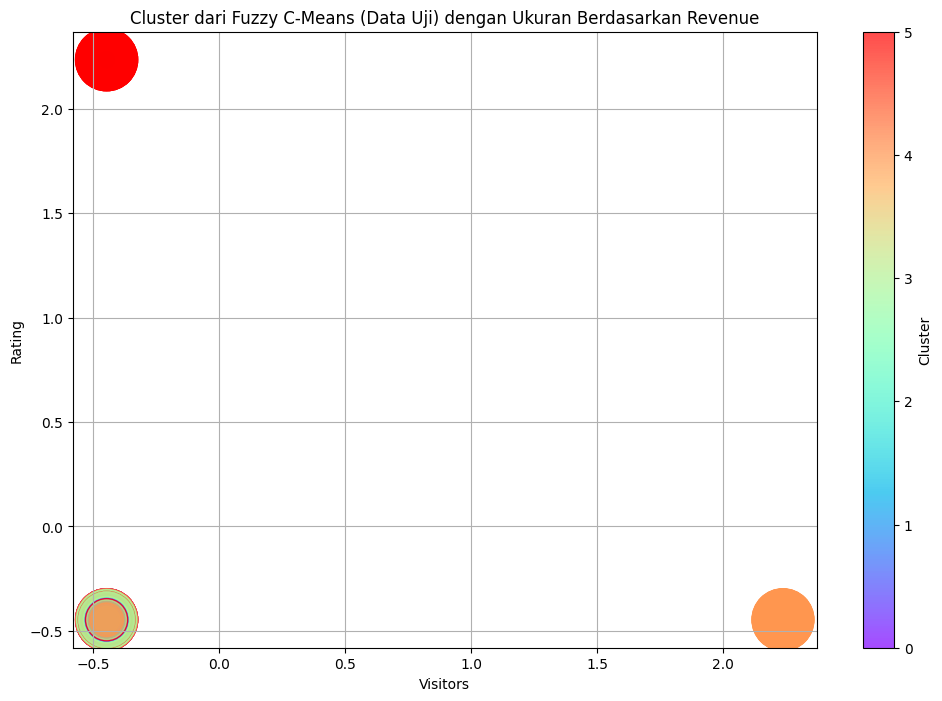

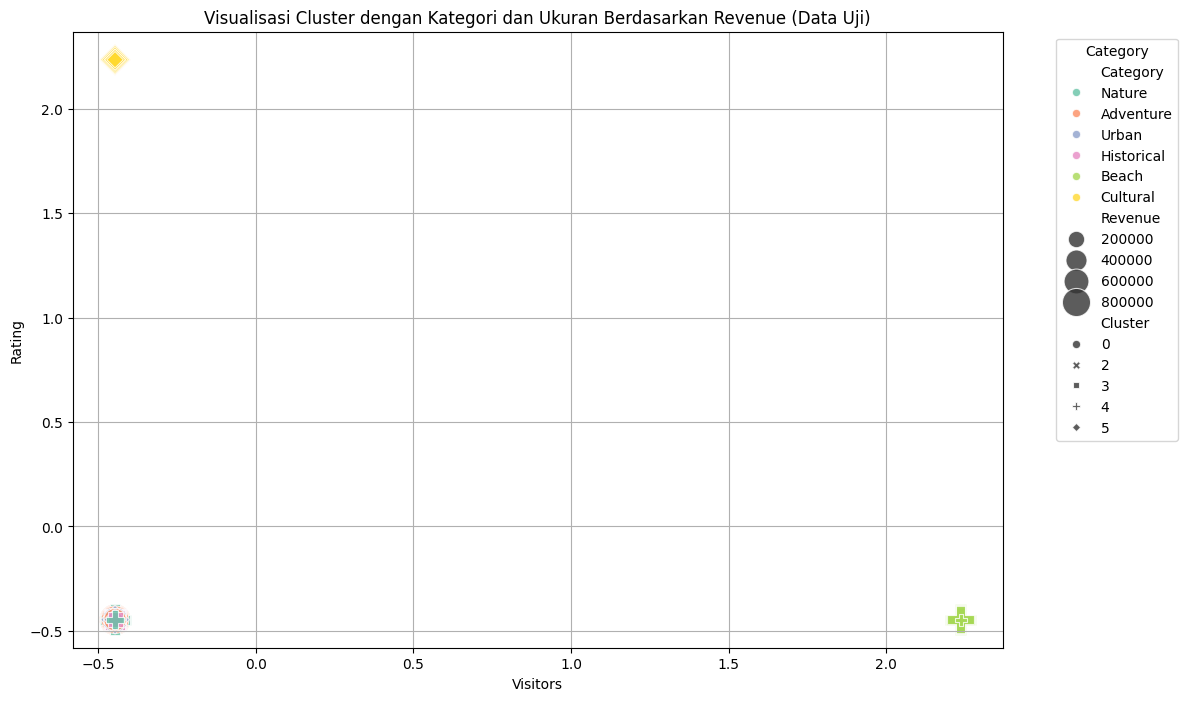


Jumlah data dalam tiap cluster (Data Uji):
Cluster  Category  
0        Adventure     205
         Urban           7
2        Cultural        2
         Urban          56
3        Historical    206
4        Beach         179
         Nature        204
5        Cultural      199
         Urban         140
Name: count, dtype: int64

Rata-rata Revenue di tiap Cluster (Data Uji):
Cluster
0    468532.601462
2    243721.701207
3    478215.207670
4    502911.607702
5    570063.733245
Name: Revenue, dtype: float64


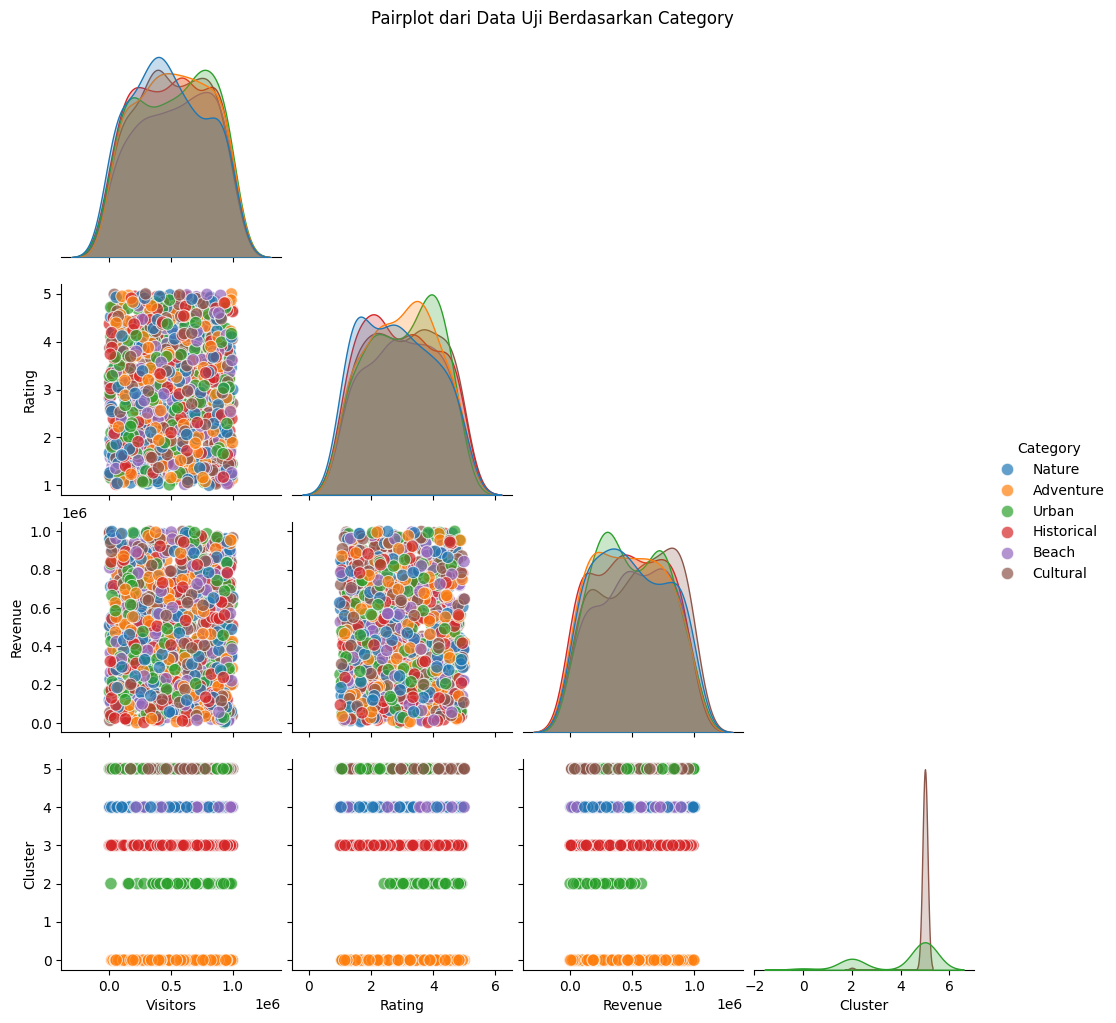

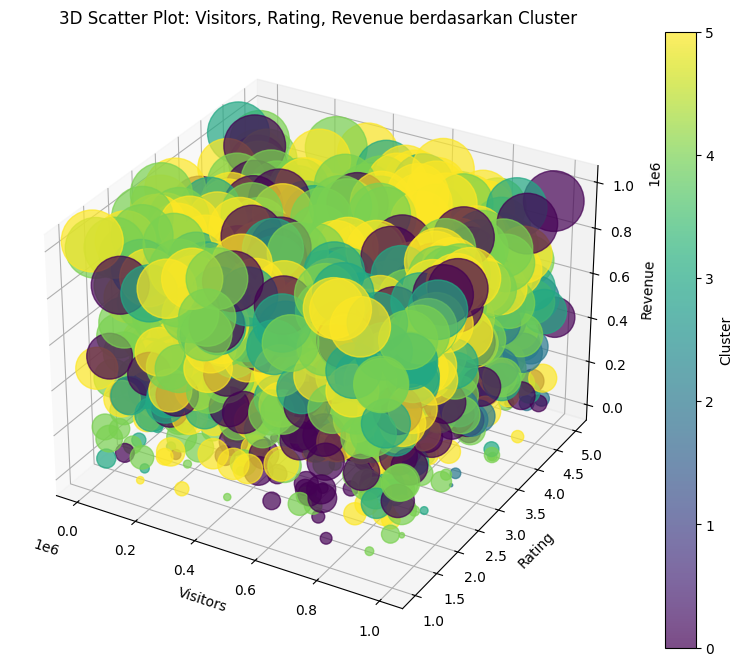

Hasil clustering untuk data training telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/fuzzycmeans-tourism_dataset_train_with_clusters.csv
Hasil clustering untuk data testing telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/fuzzycmeans-tourism_dataset_test_with_clusters.csv

Ringkasan Statistik untuk Setiap Cluster dengan Kategori:
   Cluster  Number of Countries  Average Visitors  Average Rating  \
0      0.0                212.0     528521.061321        2.949764   
1      2.0                 58.0     639501.965517        3.905690   
2      3.0                206.0     506245.067961        2.955922   
3      4.0                383.0     502324.096606        2.927023   
4      5.0                339.0     491766.941003        2.943156   
5      NaN                  NaN               NaN             NaN   

   Average Revenue  Adventure  Beach  Cultural  Historical  Nature  Urban  
0    468532.601462      205.0    0.0       0.0         0.0     0.0    7.0  
1    24

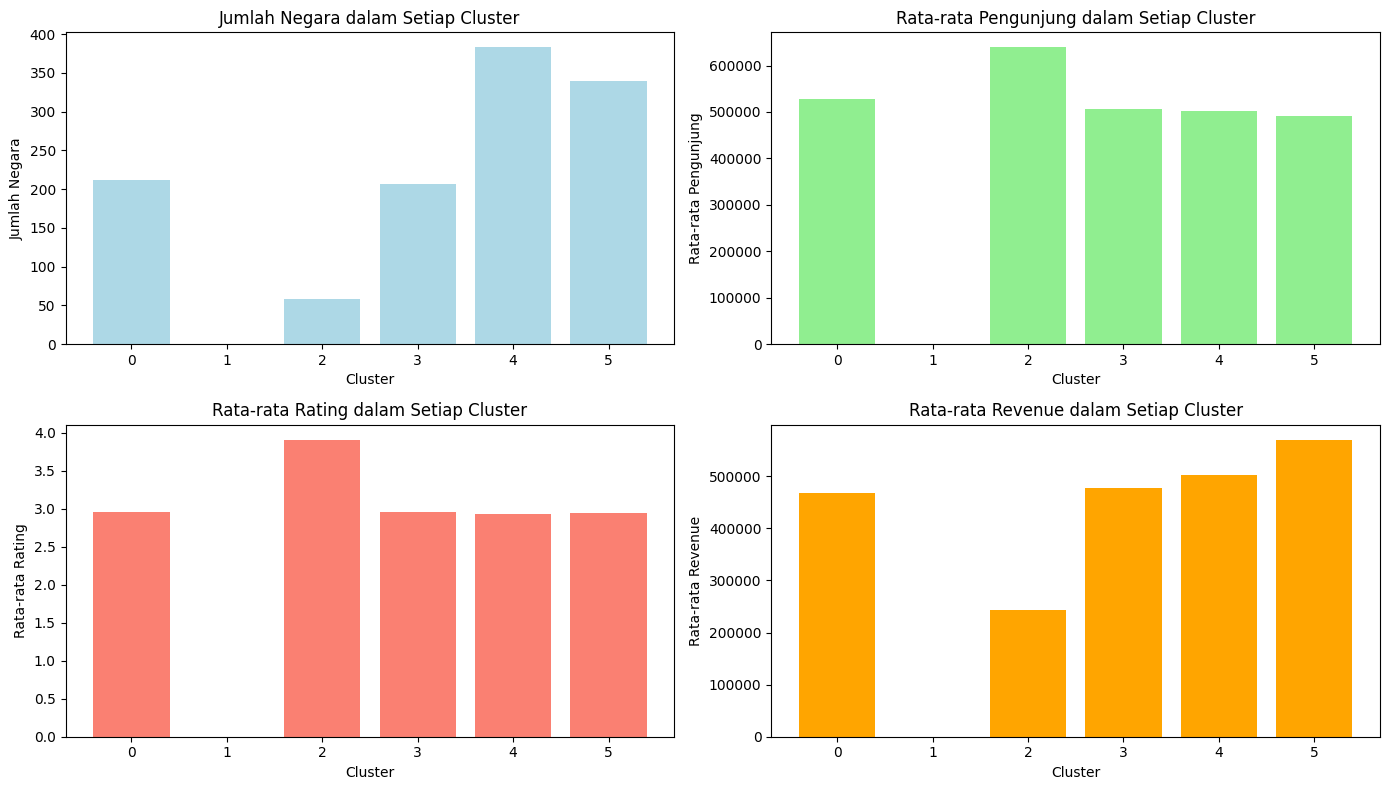

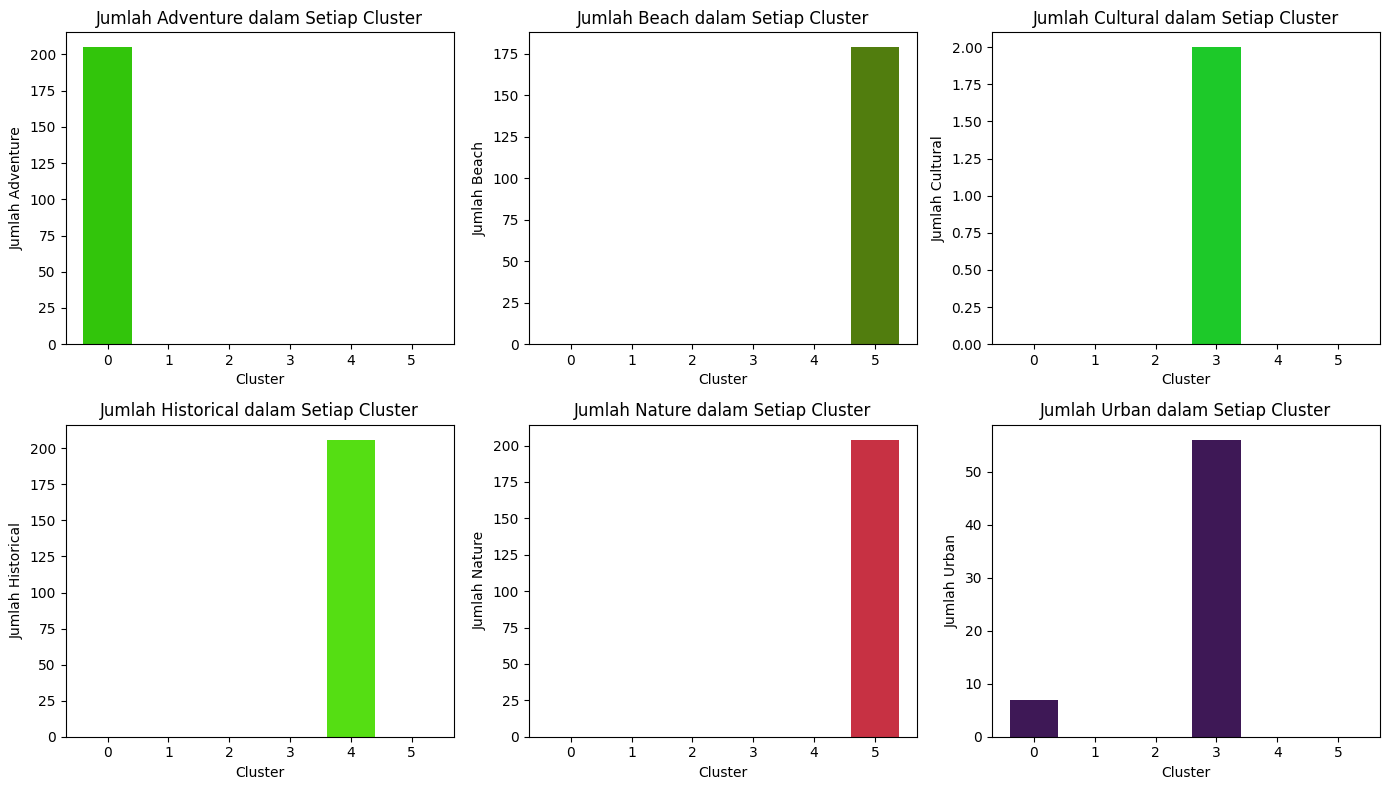

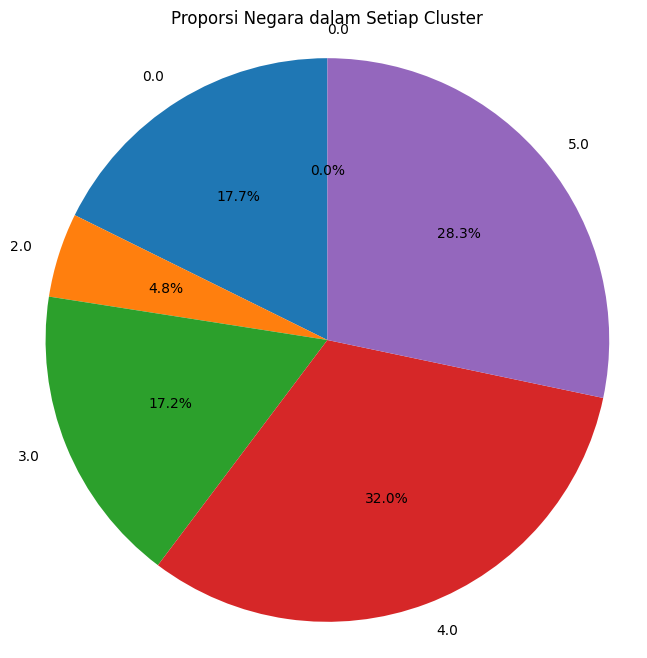


Negara dengan Rata-rata Pengunjung Tertinggi per Cluster:
    Cluster Country    Category       Visitors
3         0  Brazil       Urban  795519.500000
14        2   Egypt    Cultural  971124.000000
20        3  Brazil  Historical  576288.466667
28        4  Brazil       Beach  568780.162162
46        5   Egypt    Cultural  557922.933333


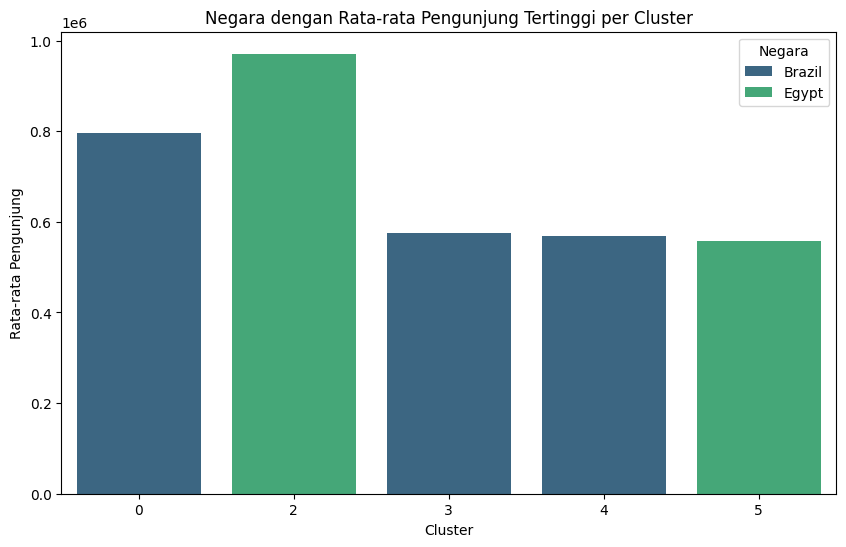


Negara dengan Rata-rata Rating Tertinggi per Cluster:
    Cluster    Country    Category    Rating
7         0      India   Adventure  3.232333
12        2      China    Cultural  4.910000
19        3  Australia  Historical  3.230357
38        4        USA       Beach  3.246000
48        5     France    Cultural  3.284643


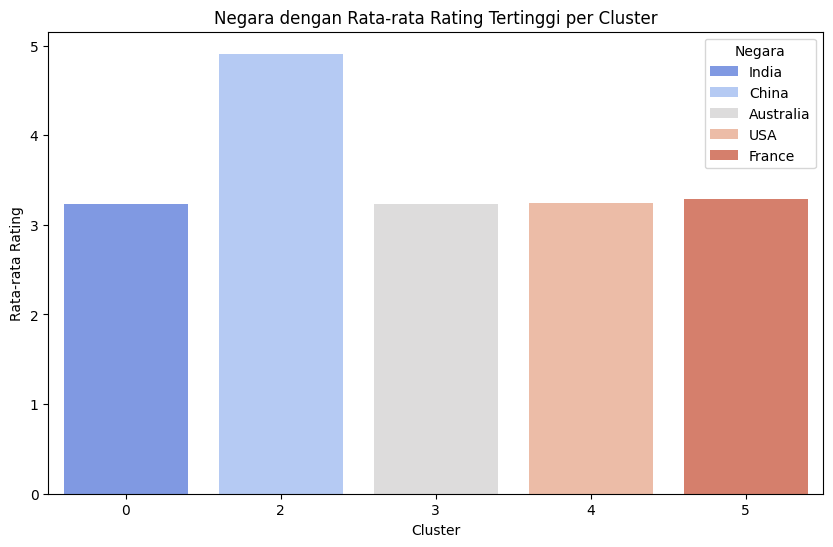


Negara dengan Rata-rata Revenue Tertinggi per Cluster:
    Cluster    Country    Category        Revenue
5         0      Egypt   Adventure  569817.507857
16        2     France       Urban  285560.660000
22        3      Egypt  Historical  550320.990938
29        4     Brazil      Nature  620994.447917
41        5  Australia       Urban  666754.175263


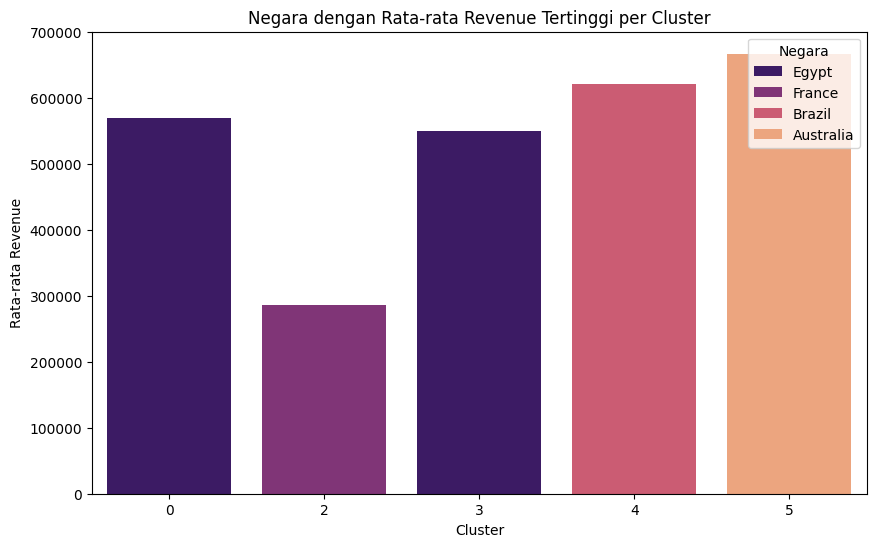

Hasil untuk Cluster 0 telah disimpan dalam file: cluster_0_analysis.csv
Hasil untuk Cluster 2 telah disimpan dalam file: cluster_2_analysis.csv
Hasil untuk Cluster 3 telah disimpan dalam file: cluster_3_analysis.csv
Hasil untuk Cluster 4 telah disimpan dalam file: cluster_4_analysis.csv
Hasil untuk Cluster 5 telah disimpan dalam file: cluster_5_analysis.csv

Negara-Negara untuk Cluster 0:
     Cluster    Country   Category  Visitors  Rating    Revenue
0          0        USA  Adventure    997568    1.89  425504.43
1          0      Egypt  Adventure    996345    1.13  286623.43
2          0  Australia  Adventure    989228    5.00  419299.31
3          0     France  Adventure    987223    4.19  200048.80
4          0        USA  Adventure    986908    4.87  953014.60
..       ...        ...        ...       ...     ...        ...
207        0      Egypt  Adventure     50099    4.43  474279.12
208        0      Egypt  Adventure     48988    2.30  626611.77
209        0      China  Adventu

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Fuzzy C-Means
import skfuzzy as fuzz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke direktori dataset
dataset_dir = '/content/drive/MyDrive/UTSDATASET/tourism_dataset-2.csv'

# memuat dataset
df = pd.read_csv(dataset_dir)
print(df)

# Data Cleaning: menghapus nilai yang hilang - jika ada
df_selected = df[['Category','Country', 'Visitors', 'Rating', 'Revenue']]
df_selected.dropna(inplace=True)
print(df_selected)

# konversi kolom yang terpilih ke numerik - jika belum
df_selected['Visitors'] = pd.to_numeric(df_selected['Visitors'], errors='coerce')
df_selected['Rating'] = pd.to_numeric(df_selected['Rating'], errors='coerce')
df_selected['Revenue'] = pd.to_numeric(df_selected['Revenue'], errors='coerce')

# Inisialisasi OneHotEncoder
onehot = OneHotEncoder()

# Encode kolom 'Category'
category_encoded = onehot.fit_transform(df_selected[['Category']]).toarray()

# Gabungkan hasil One-Hot Encoding dengan fitur lainnya
X = np.concatenate([category_encoded, df_selected[['Visitors', 'Rating', 'Revenue']].values], axis=1)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pisah dataset menjadi data latih dan uji
X_train, X_test, df_train, df_test = train_test_split(X_scaled, df_selected, test_size=0.2, random_state=3)

# Menentukan jumlah cluster
n_clusters = 6

# Inisialisasi Fuzzy C-Means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_train.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# Menentukan cluster dengan keanggotaan maksimum
cluster_labels_train = np.argmax(u, axis=0)

# Menambahkan label cluster ke dataframe latih
df_train['Cluster'] = cluster_labels_train

# Melatih model pada data uji
cntr_test, u_test, u0_test, d_test, jm_test, p_test, fpc_test = fuzz.cluster.cmeans(X_test.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

# Menentukan cluster dengan keanggotaan maksimum untuk data uji
cluster_labels_test = np.argmax(u_test, axis=0)

# Menambahkan label cluster ke dataframe uji
df_test['Cluster'] = cluster_labels_test

# Visualisasi Cluster untuk data uji (Bubble plot dengan Revenue sebagai ukuran)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_test[:, 1], X_test[:, 2], c=cluster_labels_test, cmap='rainbow', s=(df_test['Revenue'] / 500), alpha=0.7)  # Ukuran diperbesar
plt.title('Cluster dari Fuzzy C-Means (Data Uji) dengan Ukuran Berdasarkan Revenue')
plt.xlabel('Visitors')
plt.ylabel('Rating')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)  # Tambahkan grid agar lebih jelas
plt.show()

# Visualisasi data uji berdasarkan cluster dan kategori dengan ukuran berdasarkan Revenue
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_test[:, 1], y=X_test[:, 2], hue=df_test['Category'], style=df_test['Cluster'],
                size=df_test['Revenue'], sizes=(50, 500), palette='Set2', alpha=0.8)  # Ukuran diperbesar
plt.title('Visualisasi Cluster dengan Kategori dan Ukuran Berdasarkan Revenue (Data Uji)')
plt.xlabel('Visitors')
plt.ylabel('Rating')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)  # Tambahkan grid
plt.show()

# Menampilkan jumlah data dalam setiap cluster di data uji
print("\nJumlah data dalam tiap cluster (Data Uji):")
print(df_test[['Cluster', 'Category']].value_counts().sort_index())

# Menampilkan rata-rata revenue per cluster di data uji
average_revenue_per_cluster = df_test.groupby('Cluster')['Revenue'].mean()
print("\nRata-rata Revenue di tiap Cluster (Data Uji):")
print(average_revenue_per_cluster)

# Pairplot berdasarkan kategori (catatan menjelaskan grafiknya)
sns.pairplot(df_test, hue='Category', diag_kind='kde', corner=True, plot_kws={'alpha': 0.7, 's': 80})
plt.suptitle('Pairplot dari Data Uji Berdasarkan Category', y=1.02)
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot berdasarkan Visitors, Rating, dan Revenue
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Menggunakan cluster sebagai warna dan Revenue sebagai ukuran titik
scatter = ax.scatter(df_test['Visitors'], df_test['Rating'], df_test['Revenue'],
                     c=cluster_labels_test, cmap='viridis', s=df_test['Revenue'] / 500, alpha=0.7)

ax.set_title('3D Scatter Plot: Visitors, Rating, Revenue berdasarkan Cluster')
ax.set_xlabel('Visitors')
ax.set_ylabel('Rating')
ax.set_zlabel('Revenue')

# Tambahkan colorbar
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()

# Menyimpan dataframe training dengan cluster ke dalam file CSV
train_output_path = '/content/drive/MyDrive/UTSDATASET/fuzzycmeans-tourism_dataset_train_with_clusters.csv'
df_train.to_csv(train_output_path, index=False)

print(f'Hasil clustering untuk data training telah disimpan dalam file: {train_output_path}')

# Menyimpan dataframe testing dengan cluster ke dalam file CSV
test_output_path = '/content/drive/MyDrive/UTSDATASET/fuzzycmeans-tourism_dataset_test_with_clusters.csv'
df_test.to_csv(test_output_path, index=False)

print(f'Hasil clustering untuk data testing telah disimpan dalam file: {test_output_path}')

# Menghitung statistik untuk setiap cluster, termasuk Category
cluster_summary = df_test.groupby('Cluster').agg({
    'Country': 'count',  # Jumlah negara dalam setiap cluster
    'Visitors': 'mean',  # Rata-rata pengunjung
    'Rating': 'mean',    # Rata-rata rating
    'Revenue': 'mean'    # Rata-rata revenue
}).reset_index()

# Menambahkan analisis jumlah kategori dalam setiap cluster
category_summary = df_test.groupby(['Cluster', 'Category']).size().unstack(fill_value=0)

# Gabungkan kedua summary: cluster_summary dan category_summary
cluster_summary = pd.concat([cluster_summary, category_summary], axis=1)

# Menamai kolom
cluster_summary.columns = ['Cluster', 'Number of Countries', 'Average Visitors', 'Average Rating', 'Average Revenue'] + list(category_summary.columns)

# Menampilkan ringkasan cluster
print("\nRingkasan Statistik untuk Setiap Cluster dengan Kategori:")
print(cluster_summary)

# Visualisasi ringkasan statistik dengan bar chart
plt.figure(figsize=(14, 8))

# Bar chart untuk jumlah negara
plt.subplot(2, 2, 1)
plt.bar(cluster_summary['Cluster'], cluster_summary['Number of Countries'], color='lightblue')
plt.title('Jumlah Negara dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Negara')

# Bar chart untuk rata-rata pengunjung
plt.subplot(2, 2, 2)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Visitors'], color='lightgreen')
plt.title('Rata-rata Pengunjung dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pengunjung')

# Bar chart untuk rata-rata rating
plt.subplot(2, 2, 3)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Rating'], color='salmon')
plt.title('Rata-rata Rating dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Rating')

# Bar chart untuk rata-rata revenue
plt.subplot(2, 2, 4)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Revenue'], color='orange')
plt.title('Rata-rata Revenue dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Revenue')

plt.tight_layout()
plt.show()

# Visualisasi proporsi kategori dalam setiap cluster menggunakan bar plot
plt.figure(figsize=(14, 8))

# Bar plot untuk setiap kategori dalam setiap cluster
for i, category in enumerate(category_summary.columns, start=1):
    plt.subplot(2, 3, i)
    plt.bar(cluster_summary['Cluster'], cluster_summary[category], color=np.random.rand(3,))
    plt.title(f'Jumlah {category} dalam Setiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Jumlah {category}')

plt.tight_layout()
plt.show()

# Mengisi nilai NaN dengan 0 pada cluster_summary
cluster_summary = cluster_summary.fillna(0)

# Visualisasi dalam bentuk pie chart untuk jumlah negara di setiap cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_summary['Number of Countries'], labels=cluster_summary['Cluster'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Negara dalam Setiap Cluster')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

# Menampilkan negara-negara dalam setiap cluster dalam bentuk tabel
countries_per_cluster = {
    f'Cluster {cluster}': df_test[df_test['Cluster'] == cluster][['Country', 'Category']].apply(
        lambda x: f"{x['Country']} ({x['Category']})", axis=1).tolist()
    for cluster in range(n_clusters)
}

countries_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in countries_per_cluster.items()]))

# Menghitung rata-rata pengunjung untuk setiap negara dalam cluster
visitors_per_country = df_test.groupby(['Cluster', 'Country', 'Category'])['Visitors'].mean().reset_index()

# Mendapatkan negara dengan rata-rata pengunjung tertinggi per cluster
top_countries = visitors_per_country.loc[visitors_per_country.groupby('Cluster')['Visitors'].idxmax()]

# Menampilkan negara dengan rata-rata pengunjung tertinggi di setiap cluster
print("\nNegara dengan Rata-rata Pengunjung Tertinggi per Cluster:")
print(top_countries)

# Visualisasi Negara dengan Rata-rata Pengunjung Tertinggi di Setiap Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Cluster', y='Visitors', hue='Country', palette='viridis')
plt.title('Negara dengan Rata-rata Pengunjung Tertinggi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pengunjung')
plt.legend(title='Negara')
plt.show()

# Menampilkan negara dengan rata-rata rating tertinggi per cluster
rating_per_country = df_test.groupby(['Cluster', 'Country', 'Category'])['Rating'].mean().reset_index()

# Mendapatkan negara dengan rata-rata rating tertinggi per cluster
top_ratings = rating_per_country.loc[rating_per_country.groupby('Cluster')['Rating'].idxmax()]

# Menampilkan negara dengan rata-rata rating tertinggi di setiap cluster
print("\nNegara dengan Rata-rata Rating Tertinggi per Cluster:")
print(top_ratings)

# Visualisasi Negara dengan Rata-rata Rating Tertinggi di Setiap Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ratings, x='Cluster', y='Rating', hue='Country', palette='coolwarm')
plt.title('Negara dengan Rata-rata Rating Tertinggi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Rating')
plt.legend(title='Negara')
plt.show()

# Menampilkan negara dengan rata-rata revenue tertinggi per cluster
revenue_per_country = df_test.groupby(['Cluster', 'Country', 'Category'])['Revenue'].mean().reset_index()

# Mendapatkan negara dengan rata-rata revenue tertinggi per cluster
top_revenues = revenue_per_country.loc[revenue_per_country.groupby('Cluster')['Revenue'].idxmax()]

# Menampilkan negara dengan rata-rata revenue tertinggi di setiap cluster
print("\nNegara dengan Rata-rata Revenue Tertinggi per Cluster:")
print(top_revenues)

# Visualisasi Negara dengan Rata-rata Revenue Tertinggi di Setiap Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=top_revenues, x='Cluster', y='Revenue', hue='Country', palette='magma')
plt.title('Negara dengan Rata-rata Revenue Tertinggi per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Revenue')
plt.legend(title='Negara')
plt.show()

# Menampilkan negara-negara berdasarkan Visitors, Rating, Revenue, dan Category
cluster_analysis = df_test.groupby('Cluster')[['Country', 'Category', 'Visitors', 'Rating', 'Revenue']].apply(
    lambda x: x.sort_values(['Visitors', 'Revenue', 'Rating'], ascending=False)
).reset_index(drop=False)  # Menjaga index level dan menambahkan level sebagai kolom

# Menghapus kolom level_1
cluster_analysis = cluster_analysis.drop(columns=['level_1'])

# Menyimpan hasil analisis per cluster ke dalam file CSV terpisah
for cluster in cluster_analysis['Cluster'].unique():
    cluster_data = cluster_analysis[cluster_analysis['Cluster'] == cluster].drop(columns='Cluster')
    cluster_data.to_csv(f'/content/drive/MyDrive/UTSDATASET/fuzzycmeans-cluster_{cluster}_analysis.csv', index=False)
    print(f"Hasil untuk Cluster {cluster} telah disimpan dalam file: cluster_{cluster}_analysis.csv")

# Menampilkan hasil analisis per cluster
for cluster in cluster_analysis['Cluster'].unique():
    print(f"\nNegara-Negara untuk Cluster {cluster}:")
    print(cluster_analysis[cluster_analysis['Cluster'] == cluster])

# Evaluasi Silhouette Score untuk data training
silhouette_train = silhouette_score(X_train, cluster_labels_train)
print(f"Silhouette Score untuk Training Data: {silhouette_train:.4f}")

# Evaluasi Silhouette Score untuk data testing
silhouette_test = silhouette_score(X_test, cluster_labels_test)
print(f"Silhouette Score untuk Testing Data: {silhouette_test:.4f}")

Fuzzy C-Means With PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0          

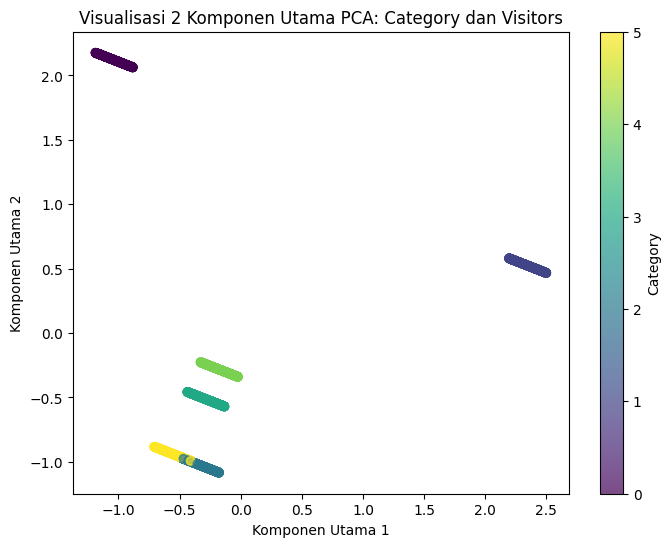

Komponen utama PCA:
[[-0.38802987  0.87858777 -0.11877053 -0.10200043 -0.06090103 -0.20348393
  -0.08883232]
 [ 0.8053317   0.19820868 -0.37986851 -0.18819609 -0.10058987 -0.34817276
   0.03307153]]

Variansi yang dijelaskan oleh setiap komponen:
[0.17547905 0.17278579]

Jumlah data dalam tiap cluster (Data Uji):
Cluster  Category  
0        Beach          84
1        Beach          95
2        Historical    206
3        Adventure     205
4        Nature        204
5        Cultural      201
         Urban         203
Name: count, dtype: int64


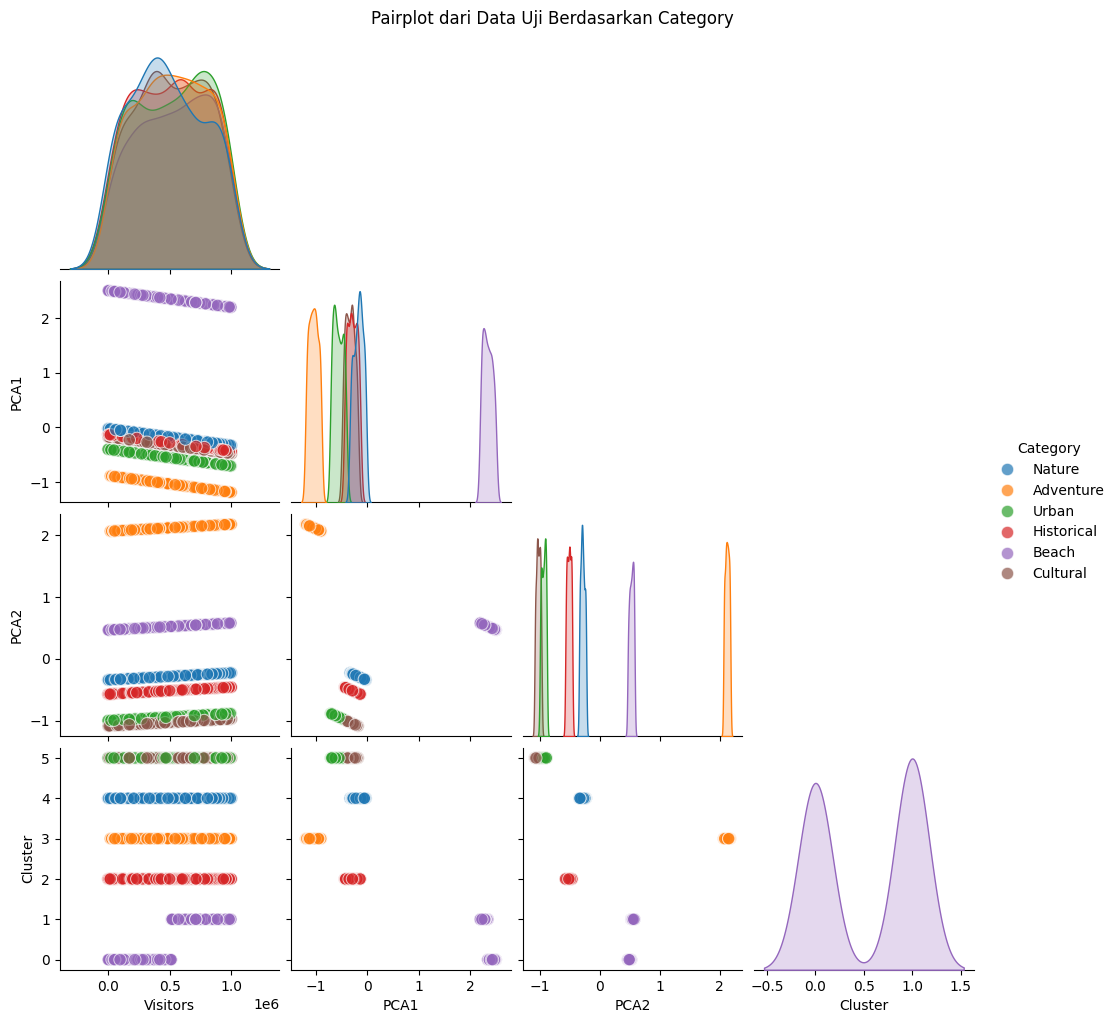

Hasil clustering untuk data training telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/fuzzywithpca-tourism_dataset_train_with_clusters_fcm.csv
Hasil clustering untuk data testing telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/fuzzywithpca-tourism_dataset_test_with_clusters_fcm.csv

Ringkasan Statistik untuk Setiap Cluster (Category dan Visitors):
   Cluster  Average Visitors  Number of Unique Categories  Adventure  Beach  \
0        0     259028.428571                            1          0     84   
1        1     766620.484211                            1          0     95   
2        2     506245.067961                            1          0      0   
3        3     520220.331707                            1        205      0   
4        4     479425.465686                            1          0      0   
5        5     517825.257426                            2          0      0   

   Cultural  Historical  Nature  Urban  
0         0           0       

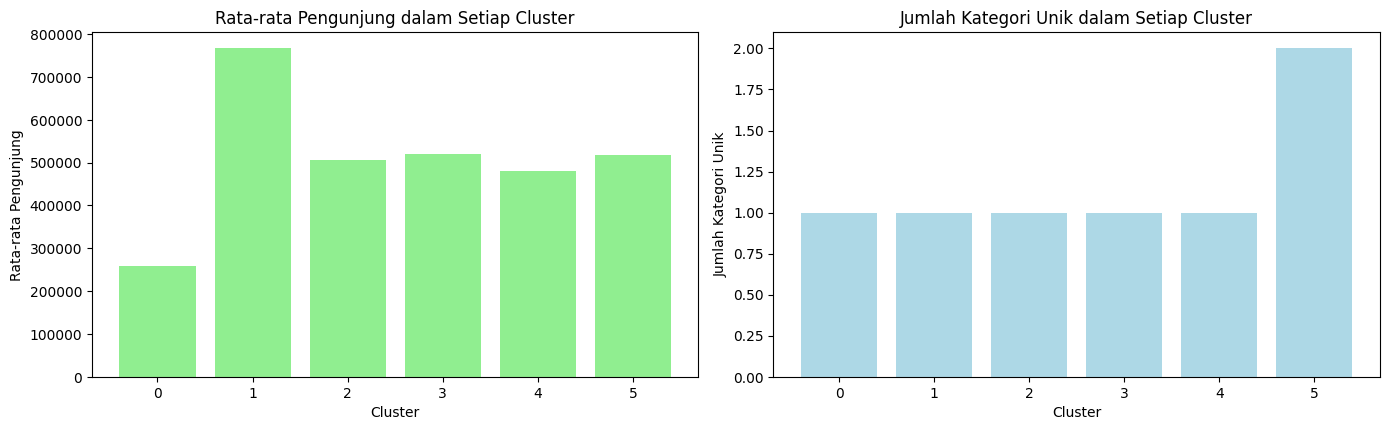

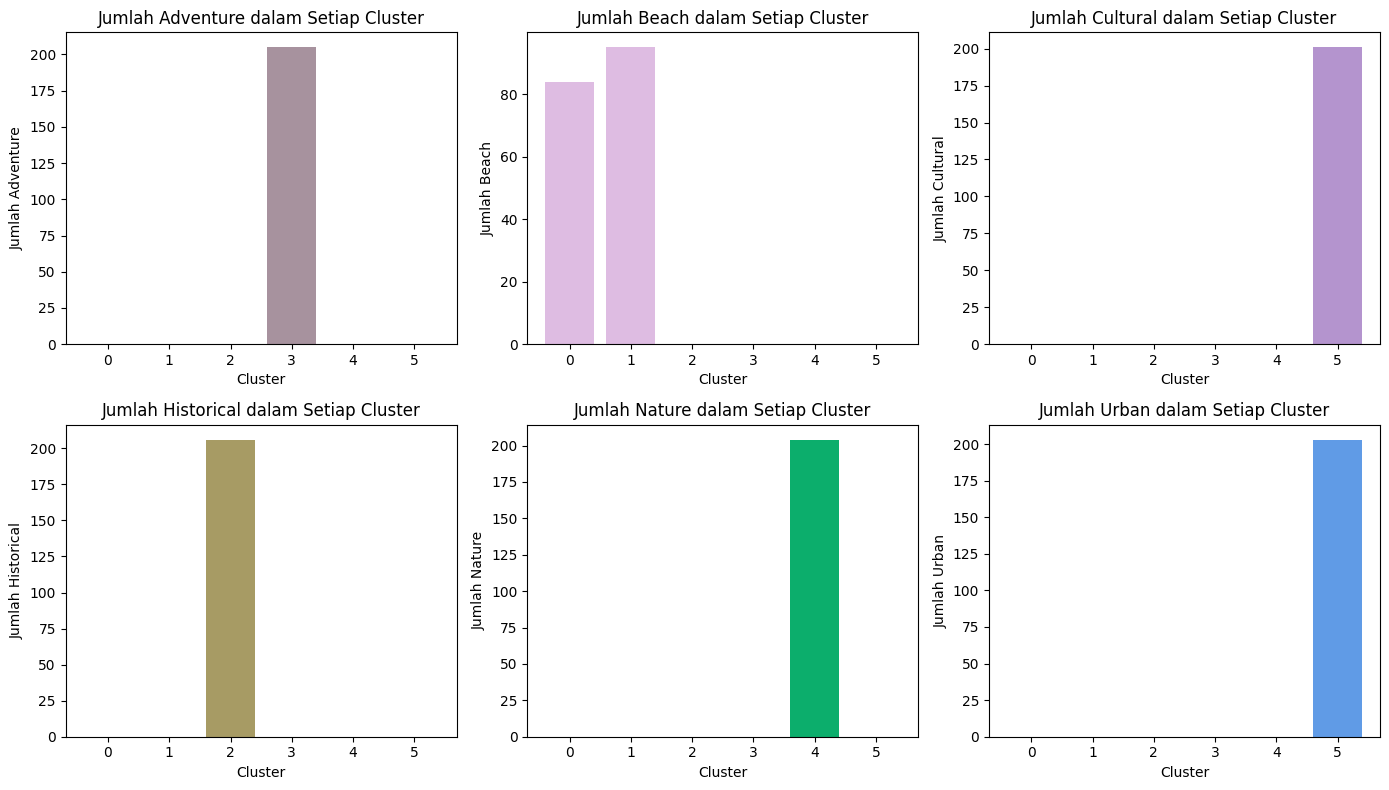

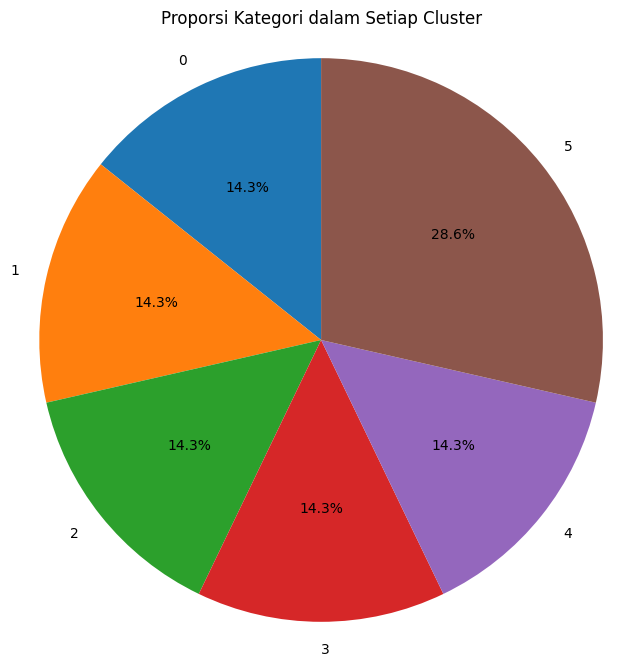

Hasil untuk Cluster 0 telah disimpan dalam file: fcm(pca)cluster_0_analysis.csv
Hasil untuk Cluster 1 telah disimpan dalam file: fcm(pca)cluster_1_analysis.csv
Hasil untuk Cluster 2 telah disimpan dalam file: fcm(pca)cluster_2_analysis.csv
Hasil untuk Cluster 3 telah disimpan dalam file: fcm(pca)cluster_3_analysis.csv
Hasil untuk Cluster 4 telah disimpan dalam file: fcm(pca)cluster_4_analysis.csv
Hasil untuk Cluster 5 telah disimpan dalam file: fcm(pca)cluster_5_analysis.csv

Negara-Negara untuk Cluster 0:
    Cluster    Country Category  Visitors
0         0     France    Beach    511471
1         0     Brazil    Beach    511085
2         0      China    Beach    502561
3         0  Australia    Beach    498709
4         0      China    Beach    491807
..      ...        ...      ...       ...
79        0      India    Beach      9886
80        0      Egypt    Beach      9819
81        0      India    Beach      9053
82        0      India    Beach      8850
83        0      China    

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke direktori dataset
dataset_dir = '/content/drive/MyDrive/UTSDATASET/tourism_dataset-2.csv'

# Memuat dataset
df = pd.read_csv(dataset_dir)
print(df)

# Data Cleaning: menghapus nilai yang hilang - jika ada
df_selected = df[['Country','Category', 'Visitors']]
df_selected.dropna(inplace=True)
print(df_selected)

# Konversi kolom yang terpilih ke numerik - jika belum
df_selected['Visitors'] = pd.to_numeric(df_selected['Visitors'], errors='coerce')

# Inisialisasi OneHotEncoder
onehot = OneHotEncoder()

# Encode kolom 'Category'
category_encoded = onehot.fit_transform(df_selected[['Category']]).toarray()

# Gabungkan hasil One-Hot Encoding dengan fitur lainnya
X = np.concatenate([category_encoded, df_selected[['Visitors']].values], axis=1)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pisah dataset menjadi data latih dan uji
X_train, X_test, df_train, df_test = train_test_split(X_scaled, df_selected, test_size=0.2, random_state=3)

# Menambahkan PCA (Principal Component Analysis)
pca = PCA(n_components=2)  # Reduksi ke 2 komponen utama untuk visualisasi
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualisasi hasil PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=df_train['Category'].astype('category').cat.codes, cmap='viridis', alpha=0.7)
plt.title('Visualisasi 2 Komponen Utama PCA: Category dan Visitors')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Category')
plt.show()

# Menampilkan komponen utama dan variansi yang dijelaskan
print("Komponen utama PCA:")
print(pca.components_)

print("\nVariansi yang dijelaskan oleh setiap komponen:")
print(pca.explained_variance_ratio_)

# Menambahkan hasil PCA ke DataFrame untuk analisis lebih lanjut
df_train['PCA1'] = X_train_pca[:, 0]
df_train['PCA2'] = X_train_pca[:, 1]

# Jika Anda ingin menambahkan PCA ke data uji, Anda bisa melakukan hal yang sama
X_test_pca = pca.transform(X_test)
df_test['PCA1'] = X_test_pca[:, 0]
df_test['PCA2'] = X_test_pca[:, 1]

# Inisialisasi Fuzzy C-Means untuk data latih
n_clusters = 6
fuzzy_cmeans = fuzz.cluster.cmeans(X_train_pca.T, c=n_clusters, m=2, error=0.005, maxiter=1000)

# Keanggotaan setiap sampel terhadap cluster (data latih)
u_train = fuzzy_cmeans[1]

# Menentukan cluster dengan keanggotaan maksimum untuk setiap sampel
cluster_labels_train = np.argmax(u_train, axis=0)

# Menambahkan label cluster ke dataframe latih
df_train['Cluster'] = cluster_labels_train

# Melatih model pada data uji tanpa inisialisasi pusat cluster dari data latih
fuzzy_cmeans_test = fuzz.cluster.cmeans(X_test_pca.T, c=n_clusters, m=2, error=0.005, maxiter=1000)

# Keanggotaan setiap sampel terhadap cluster (data uji)
u_test = fuzzy_cmeans_test[1]

# Menentukan cluster dengan keanggotaan maksimum untuk setiap sampel pada data uji
cluster_labels_test = np.argmax(u_test, axis=0)

# Menambahkan label cluster ke dataframe uji
df_test['Cluster'] = cluster_labels_test

# Menampilkan jumlah data dalam setiap cluster di data uji
print("\nJumlah data dalam tiap cluster (Data Uji):")
print(df_test[['Cluster', 'Category']].value_counts().sort_index())

# Pairplot berdasarkan kategori
sns.pairplot(df_test, hue='Category', diag_kind='kde', corner=True, plot_kws={'alpha': 0.7, 's': 80})
plt.suptitle('Pairplot dari Data Uji Berdasarkan Category', y=1.02)
plt.show()

# Menyimpan dataframe training dengan cluster ke dalam file CSV
train_output_path = '/content/drive/MyDrive/UTSDATASET/fuzzywithpca-tourism_dataset_train_with_clusters_fcm.csv'
df_train.to_csv(train_output_path, index=False)

print(f'Hasil clustering untuk data training telah disimpan dalam file: {train_output_path}')

# Menyimpan dataframe testing dengan cluster ke dalam file CSV
test_output_path = '/content/drive/MyDrive/UTSDATASET/fuzzywithpca-tourism_dataset_test_with_clusters_fcm.csv'
df_test.to_csv(test_output_path, index=False)

print(f'Hasil clustering untuk data testing telah disimpan dalam file: {test_output_path}')

# Menghitung statistik untuk setiap cluster, hanya untuk Category dan Visitors
cluster_summary = df_test.groupby('Cluster').agg({
    'Visitors': 'mean',  # Rata-rata pengunjung
    'Category': 'nunique'  # Jumlah kategori unik dalam setiap cluster
}).reset_index()

# Menambahkan analisis jumlah kategori dalam setiap cluster
category_summary = df_test.groupby(['Cluster', 'Category']).size().unstack(fill_value=0)

# Gabungkan kedua summary: cluster_summary dan category_summary
cluster_summary = pd.concat([cluster_summary, category_summary], axis=1)

# Menamai kolom
cluster_summary.columns = ['Cluster', 'Average Visitors', 'Number of Unique Categories'] + list(category_summary.columns)

# Menampilkan ringkasan cluster
print("\nRingkasan Statistik untuk Setiap Cluster (Category dan Visitors):")
print(cluster_summary)

# Visualisasi ringkasan statistik dengan bar chart
plt.figure(figsize=(14, 8))

# Bar chart untuk rata-rata pengunjung
plt.subplot(2, 2, 1)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Visitors'], color='lightgreen')
plt.title('Rata-rata Pengunjung dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pengunjung')

# Bar chart untuk jumlah kategori unik
plt.subplot(2, 2, 2)
plt.bar(cluster_summary['Cluster'], cluster_summary['Number of Unique Categories'], color='lightblue')
plt.title('Jumlah Kategori Unik dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Kategori Unik')

plt.tight_layout()
plt.show()

# Visualisasi proporsi kategori dalam setiap cluster menggunakan bar plot
plt.figure(figsize=(14, 8))

# Bar plot untuk setiap kategori dalam setiap cluster
for i, category in enumerate(category_summary.columns, start=1):
    plt.subplot(2, 3, i)
    plt.bar(cluster_summary['Cluster'], cluster_summary[category], color=np.random.rand(3,))
    plt.title(f'Jumlah {category} dalam Setiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Jumlah {category}')

plt.tight_layout()
plt.show()

# Visualisasi dalam bentuk pie chart untuk jumlah kategori di setiap cluster
plt.figure(figsize=(8, 8))
plt.pie(cluster_summary['Number of Unique Categories'], labels=cluster_summary['Cluster'], autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Kategori dalam Setiap Cluster')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

# Menampilkan negara-negara dalam setiap cluster dalam bentuk tabel
countries_per_cluster = {
    f'Cluster {cluster}': df_test[df_test['Cluster'] == cluster][['Country', 'Category']].apply(
        lambda x: f"{x['Country']} ({x['Category']})", axis=1).tolist()
    for cluster in range(n_clusters)
}

countries_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in countries_per_cluster.items()]))

# Menampilkan negara-negara berdasarkan Visitors, Category
cluster_analysis = df_test.groupby('Cluster')[['Country', 'Category', 'Visitors']].apply(
    lambda x: x.sort_values(['Visitors'], ascending=False)
).reset_index(drop=False)  # Menjaga index level dan menambahkan level sebagai kolom

# Menghapus kolom level_1
cluster_analysis = cluster_analysis.drop(columns=['level_1'])

# Menyimpan hasil analisis per cluster ke dalam file CSV terpisah
for cluster in cluster_analysis['Cluster'].unique():
    cluster_data = cluster_analysis[cluster_analysis['Cluster'] == cluster].drop(columns='Cluster')
    cluster_data.to_csv(f'/content/drive/MyDrive/UTSDATASET/fcm(pca)cluster_{cluster}_analysis.csv', index=False)
    print(f"Hasil untuk Cluster {cluster} telah disimpan dalam file: fcm(pca)cluster_{cluster}_analysis.csv")

# Menampilkan hasil analisis per cluster
for cluster in cluster_analysis['Cluster'].unique():
    print(f"\nNegara-Negara untuk Cluster {cluster}:")
    print(cluster_analysis[cluster_analysis['Cluster'] == cluster])

# Evaluasi Silhouette Score untuk data training
silhouette_train = silhouette_score(X_train_pca, cluster_labels_train)
print(f"Silhouette Score untuk Training Data (dengan FCM dan PCA): {silhouette_train:.4f}")

# Evaluasi Silhouette Score untuk data testing
silhouette_test = silhouette_score(X_test_pca, cluster_labels_test)
print(f"Silhouette Score untuk Testing Data (dengan FCM dan PCA): {silhouette_test:.4f}")

DBSCAN

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0          

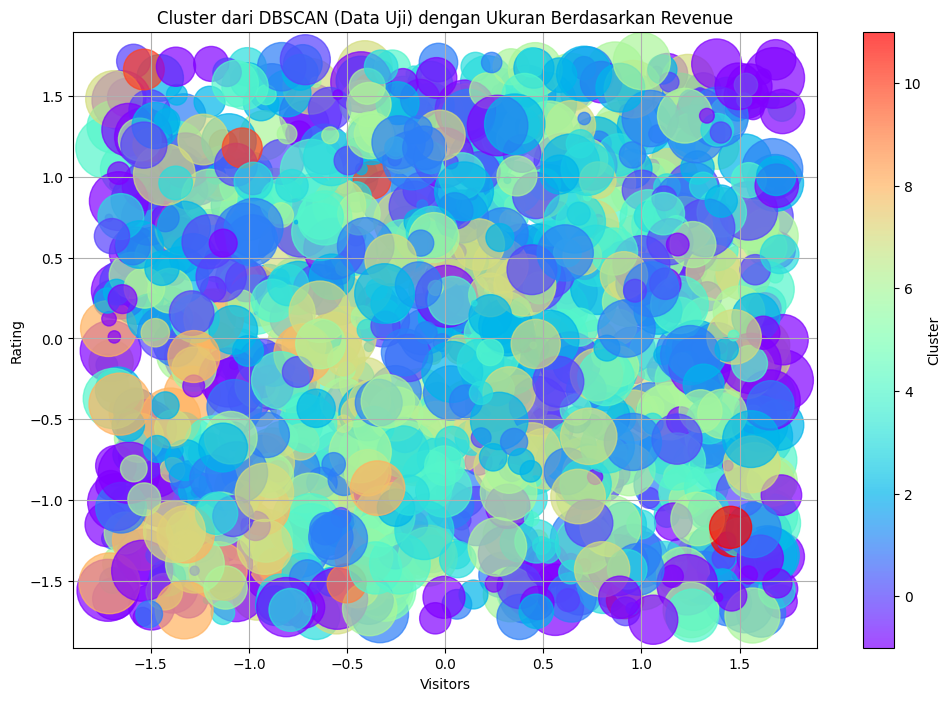

Hasil clustering untuk data training telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/tourism_dataset_train_with_clusters.csv
Hasil clustering untuk data testing telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/tourism_dataset_test_with_clusters.csv

Ringkasan Statistik untuk Setiap Cluster:
    Cluster  Average Visitors  Average Rating  Average Revenue  \
0        -1     516740.141026        3.140769    533924.733782   
1         0     502066.637615        2.975046    485062.589667   
2         1     502160.525657        3.001001    493504.348561   
3         2     496895.884298        2.994250    509611.727296   
4         3     504087.835443        2.993000    499660.601418   
5         4     499414.806650        3.082315    489912.372007   
6         5     496688.382267        2.979055    507471.295305   
7         6     503447.828341        3.015818    498680.632488   
8         7     481559.974576        3.065085    546211.581186   
9         8     545751.

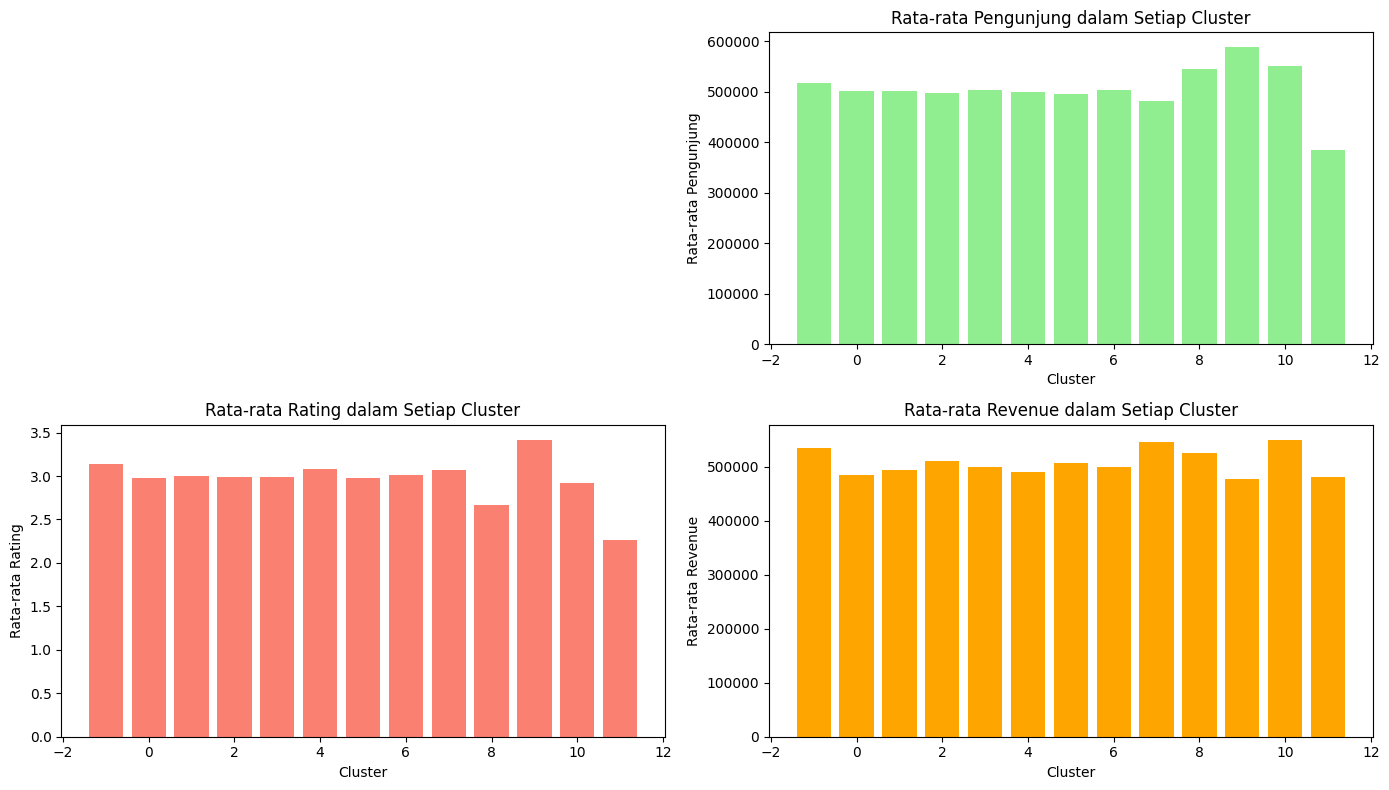


Jumlah Negara dalam Setiap Cluster:
    Cluster    Country  Count
0        -1  Australia     25
1        -1     Brazil     24
2        -1      China     13
3        -1      Egypt     25
4        -1     France     12
5        -1      India     18
6        -1        USA     39
7         0  Australia    131
8         1      India    156
9         2     France    164
10        3      China    130
11        4     Brazil    151
12        5  Australia      7
13        6      Egypt    146
14        7        USA    118
15        8      China     20
16        9  Australia      6
17       10        USA      8
18       11     Brazil      5


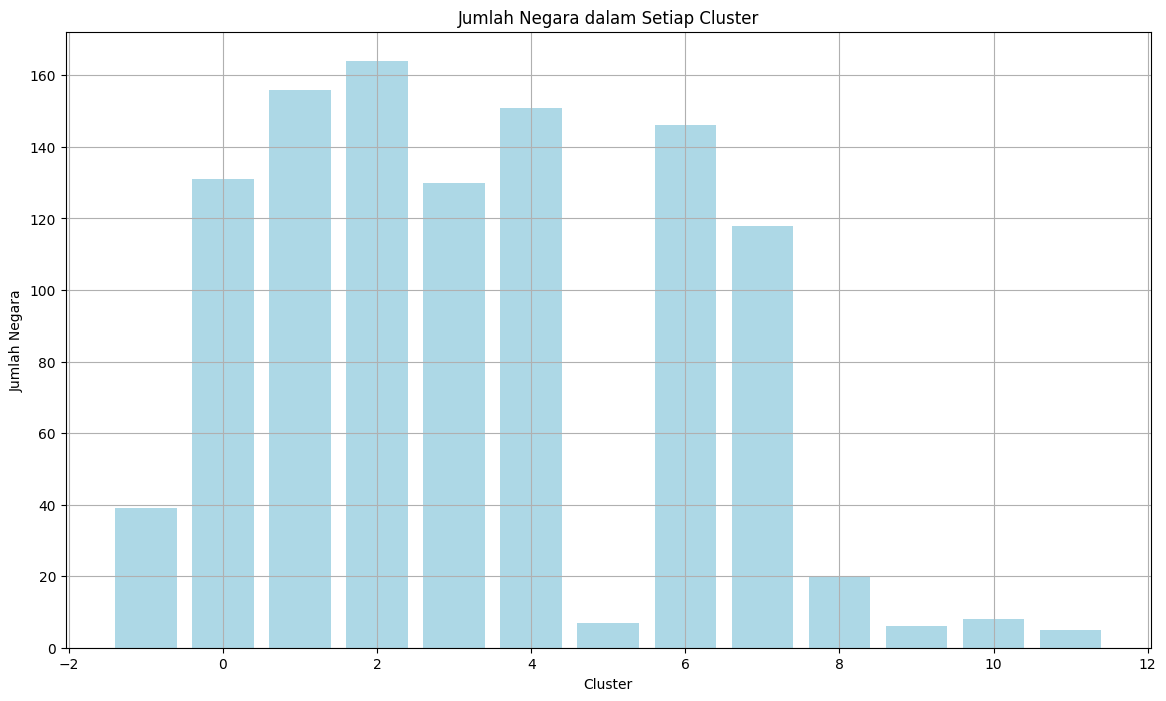

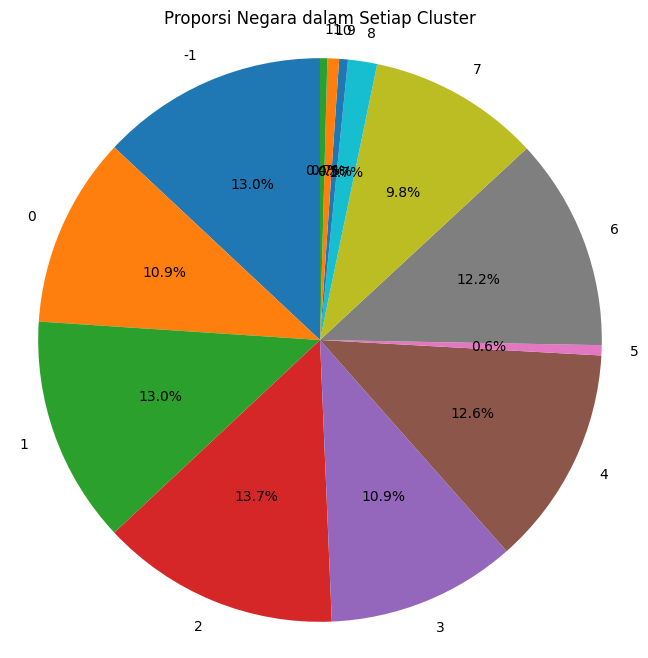

Hasil untuk Cluster 0 telah disimpan dalam file: dbscan-cluster_0_analysis.csv
Hasil untuk Cluster 1 telah disimpan dalam file: dbscan-cluster_1_analysis.csv
Hasil untuk Cluster 2 telah disimpan dalam file: dbscan-cluster_2_analysis.csv
Hasil untuk Cluster 3 telah disimpan dalam file: dbscan-cluster_3_analysis.csv
Hasil untuk Cluster 4 telah disimpan dalam file: dbscan-cluster_4_analysis.csv
Hasil untuk Cluster 5 telah disimpan dalam file: dbscan-cluster_5_analysis.csv
Hasil untuk Cluster 6 telah disimpan dalam file: dbscan-cluster_6_analysis.csv
Hasil untuk Cluster -1 telah disimpan dalam file: dbscan-cluster_-1_analysis.csv
Hasil untuk Cluster 7 telah disimpan dalam file: dbscan-cluster_7_analysis.csv
Hasil untuk Cluster 11 telah disimpan dalam file: dbscan-cluster_11_analysis.csv
Hasil untuk Cluster 10 telah disimpan dalam file: dbscan-cluster_10_analysis.csv
Hasil untuk Cluster 8 telah disimpan dalam file: dbscan-cluster_8_analysis.csv
Hasil untuk Cluster 9 telah disimpan dalam fil

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder

# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke direktori dataset
dataset_dir = '/content/drive/MyDrive/UTSDATASET/tourism_dataset-2.csv'

# Memuat dataset
df = pd.read_csv(dataset_dir)
print(df)

# Data Cleaning: menghapus nilai yang hilang - jika ada
df_selected = df[['Country', 'Visitors', 'Rating', 'Revenue']]  # Hilangkan 'Category'
df_selected.dropna(inplace=True)
print(df_selected)

# konversi kolom yang terpilih ke numerik - jika belum
df_selected['Visitors'] = pd.to_numeric(df_selected['Visitors'], errors='coerce')
df_selected['Rating'] = pd.to_numeric(df_selected['Rating'], errors='coerce')
df_selected['Revenue'] = pd.to_numeric(df_selected['Revenue'], errors='coerce')

# One-Hot Encoding untuk kolom 'Country'
onehot = OneHotEncoder(sparse_output=False)
country_encoded = onehot.fit_transform(df_selected[['Country']])

# Gabungkan hasil encoding dengan kolom lainnya
df_encoded = pd.DataFrame(country_encoded, columns=onehot.categories_[0])

# Gabungkan hasil encoding dengan kolom lainnya
df_selected_encoded = pd.concat([df_selected[['Country', 'Visitors', 'Rating', 'Revenue']], df_encoded], axis=1)

# Pastikan kolom 'Visitors', 'Rating', dan 'Revenue' ada dalam df_selected_encoded
print(df_selected_encoded.columns)

# Gabungkan hasil encoding dengan kolom lainnya
X = df_selected_encoded[['Visitors', 'Rating', 'Revenue'] + list(df_encoded.columns)].values

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Pisah dataset menjadi data latih dan uji
X_train, X_test, df_train, df_test = train_test_split(X_scaled, df_selected_encoded, test_size=0.2, random_state=3)

# Inisialisasi DBSCAN untuk data latih
dbscan = DBSCAN(eps=0.8, min_samples=8)

# Melatih model pada data latih
cluster_labels_train = dbscan.fit_predict(X_train)

# Menambahkan label cluster ke dataframe latih
df_train['Cluster'] = cluster_labels_train

# Melatih model pada data uji
cluster_labels_test = dbscan.fit_predict(X_test)

# Menambahkan label cluster ke dataframe uji
df_test['Cluster'] = cluster_labels_test

# Visualisasi Cluster untuk data uji (Bubble plot dengan Revenue sebagai ukuran)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels_test, cmap='rainbow', s=(df_test['Revenue'] / 500), alpha=0.7)  # Ukuran diperbesar
plt.title('Cluster dari DBSCAN (Data Uji) dengan Ukuran Berdasarkan Revenue')
plt.xlabel('Visitors')
plt.ylabel('Rating')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)  # Tambahkan grid agar lebih jelas
plt.show()

# Menyimpan dataframe training dengan cluster ke dalam file CSV
train_output_path = '/content/drive/MyDrive/UTSDATASET/tourism_dataset_train_with_clusters.csv'
df_train.to_csv(train_output_path, index=False)

print(f'Hasil clustering untuk data training telah disimpan dalam file: {train_output_path}')

# Menyimpan dataframe testing dengan cluster ke dalam file CSV
test_output_path = '/content/drive/MyDrive/UTSDATASET/tourism_dataset_test_with_clusters.csv'
df_test.to_csv(test_output_path, index=False)

print(f'Hasil clustering untuk data testing telah disimpan dalam file: {test_output_path}')

# Menghitung jumlah kemunculan negara dalam setiap cluster
country_count_per_cluster = df_test.groupby(['Cluster', 'Country']).size().reset_index(name='Count')

# Menghitung Most Frequent Country untuk setiap cluster
most_frequent_country = country_count_per_cluster.loc[country_count_per_cluster.groupby('Cluster')['Count'].idxmax()]

# Menghitung rata-rata kemunculan negara per cluster
average_country_occurrence = country_count_per_cluster.groupby('Cluster')['Count'].mean().reset_index()
average_country_occurrence.columns = ['Cluster', 'Average Country Occurrence']

# Menambahkan label cluster ke df_selected_encoded
# Gabungkan label cluster dari data latih dan uji
df_selected_encoded['Cluster'] = np.concatenate([cluster_labels_train, cluster_labels_test], axis=0)

# Menyusun ringkasan cluster
cluster_summary = df_selected_encoded.groupby('Cluster').agg({
    'Visitors': 'mean',    # Rata-rata pengunjung
    'Rating': 'mean',      # Rata-rata rating
    'Revenue': 'mean'      # Rata-rata revenue
}).reset_index()

# Menggabungkan Most Frequent Country dan Average Country Occurrence ke dalam cluster_summary
cluster_summary = pd.merge(cluster_summary, most_frequent_country[['Cluster', 'Country']], on='Cluster')
cluster_summary = pd.merge(cluster_summary, average_country_occurrence, on='Cluster')

# Menamai kolom
cluster_summary.columns = ['Cluster', 'Average Visitors', 'Average Rating', 'Average Revenue', 'Most Frequent Country', 'Average Country Occurrence']

# Menampilkan ringkasan cluster
print("\nRingkasan Statistik untuk Setiap Cluster:")
print(cluster_summary)

# Visualisasi ringkasan statistik dengan bar chart
plt.figure(figsize=(14, 8))

# Bar chart untuk rata-rata pengunjung
plt.subplot(2, 2, 2)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Visitors'], color='lightgreen')
plt.title('Rata-rata Pengunjung dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pengunjung')

# Bar chart untuk rata-rata rating
plt.subplot(2, 2, 3)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Rating'], color='salmon')
plt.title('Rata-rata Rating dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Rating')

# Bar chart untuk rata-rata revenue
plt.subplot(2, 2, 4)
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Revenue'], color='orange')
plt.title('Rata-rata Revenue dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Revenue')

plt.tight_layout()
plt.show()

# Menampilkan hasil perhitungan jumlah negara dalam setiap cluster
print("\nJumlah Negara dalam Setiap Cluster:")
print(country_count_per_cluster)

# Visualisasi proporsi negara dalam setiap cluster menggunakan bar plot
plt.figure(figsize=(14, 8))

# Bar plot untuk jumlah negara dalam setiap cluster
plt.bar(country_count_per_cluster['Cluster'], country_count_per_cluster['Count'], color='lightblue')
plt.title('Jumlah Negara dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Negara')
plt.grid(True)  # Menambahkan grid agar lebih jelas
plt.show()

# Visualisasi dalam bentuk pie chart untuk jumlah negara di setiap cluster
plt.figure(figsize=(8, 8))
plt.pie(country_count_per_cluster.groupby('Cluster')['Count'].sum(), labels=country_count_per_cluster['Cluster'].unique(), autopct='%1.1f%%', startangle=90)
plt.title('Proporsi Negara dalam Setiap Cluster')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.show()

cluster_analysis = df_selected_encoded[['Country', 'Cluster', 'Visitors', 'Rating', 'Revenue']]

# Menyimpan hasil analisis per cluster ke dalam file CSV terpisah
for cluster in cluster_analysis['Cluster'].unique():
    cluster_data = cluster_analysis[cluster_analysis['Cluster'] == cluster]
    # Menyimpan file CSV untuk setiap cluster
    cluster_data.to_csv(f'/content/drive/MyDrive/UTSDATASET//cluster_{cluster}_analysis.csv', index=False)
    print(f"Hasil untuk Cluster {cluster} telah disimpan dalam file: dbscan-cluster_{cluster}_analysis.csv")

# Menampilkan hasil analisis per cluster
for cluster in cluster_analysis['Cluster'].unique():
    print(f"\nNegara-Negara untuk Cluster {cluster}:")
    print(cluster_analysis[cluster_analysis['Cluster'] == cluster])


# Evaluasi Silhouette Score untuk data training
silhouette_train = silhouette_score(X_train, cluster_labels_train)
print(f"\nSilhouette Score untuk Training Data: {silhouette_train:.4f}")

# Evaluasi Silhouette Score untuk data testing
silhouette_test = silhouette_score(X_test, cluster_labels_test)
print(f"Silhouette Score untuk Testing Data: {silhouette_test:.4f}")

DBSCAN With PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0          

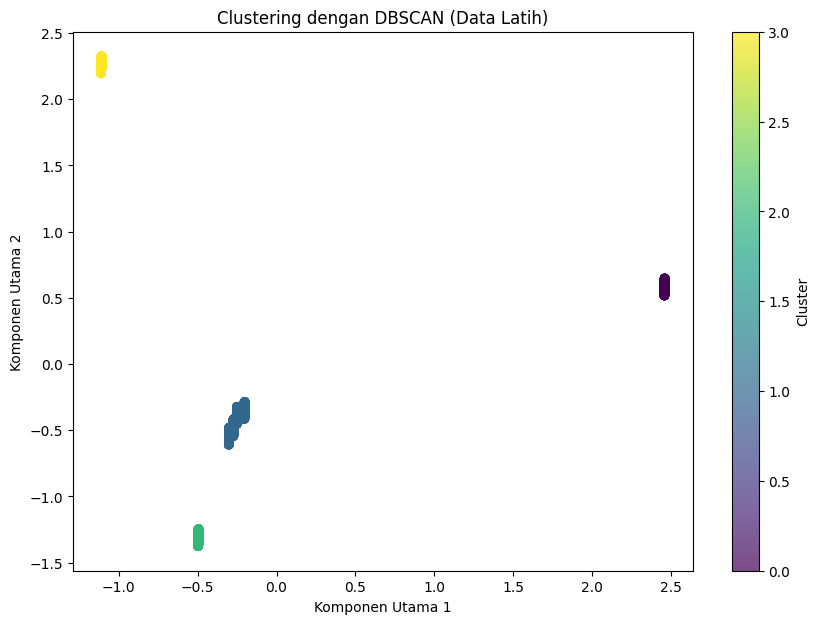

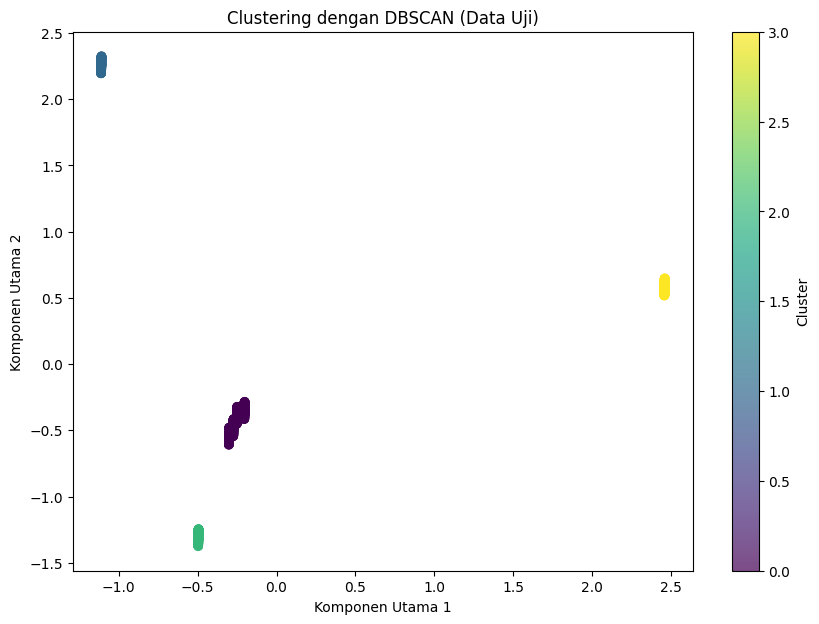

Hasil clustering dan PCA untuk data training telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/dbscan-tourism_dataset_train_with_clusters_and_pca.csv
Hasil clustering dan PCA untuk data testing telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/dbscan-tourism_dataset_test_with_clusters_and_pca.csv

Rata-rata Kemunculan Negara per Cluster:
   Cluster  Average Country Occurrence
0        0                       172.0
1        1                       174.0
2        2                       165.0
3        3                       171.0

Ringkasan Statistik untuk Setiap Cluster (Visitors):
   Cluster  Average Visitors Most Frequent Country
0        0     516601.369186                Brazil
1        1     495340.333333                 India
2        2     509505.490909                   USA
3        3     507858.590643                 Egypt


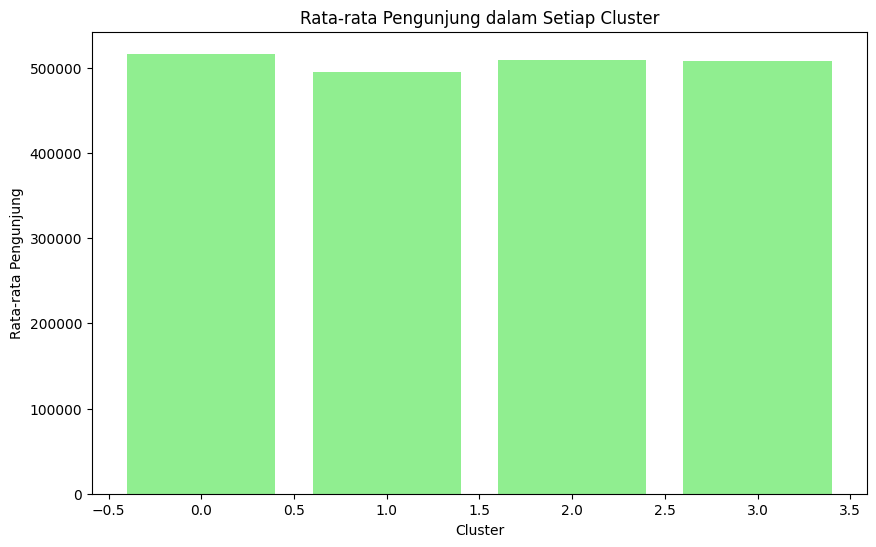

Hasil untuk Cluster 0 telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/dbscan(pca)cluster_0_analysis.csv
Hasil untuk Cluster 1 telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/dbscan(pca)cluster_1_analysis.csv
Hasil untuk Cluster 2 telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/dbscan(pca)cluster_2_analysis.csv
Hasil untuk Cluster 3 telah disimpan dalam file: /content/drive/MyDrive/UTSDATASET/dbscan(pca)cluster_3_analysis.csv

Negara-Negara untuk Cluster 0:
        Country  Cluster
17    Australia        0
3438      China        0
3923  Australia        0
3530  Australia        0
4568  Australia        0
...         ...      ...
2462     France        0
3900      China        0
3186     Brazil        0
2134     Brazil        0
2391      China        0

[688 rows x 2 columns]

Negara-Negara untuk Cluster 1:
     Country  Cluster
36     India        1
2603   India        1
5122   India        1
2454   India        1
3689   India        1
...      ...

In [ ]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

# Menghubungkan dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path ke dataset
dataset_dir = '/content/drive/MyDrive/UTSDATASET/tourism_dataset-2.csv'

# Memuat dataset
df = pd.read_csv(dataset_dir)
print(df)

# Data Cleaning: Memilih kolom yang relevan dan menghapus nilai yang hilang
df_selected = df[['Country', 'Visitors']].dropna()
print(df_selected)

# Konversi kolom 'Visitors' ke numerik
df_selected['Visitors'] = pd.to_numeric(df_selected['Visitors'], errors='coerce')

# One-Hot Encoding untuk kolom 'Country'
onehot = OneHotEncoder()
country_encoded = onehot.fit_transform(df_selected[['Country']]).toarray()

# Gabungkan hasil encoding dengan kolom 'Visitors'
X = np.concatenate([country_encoded, df_selected[['Visitors']].values], axis=1)

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi data latih dan uji
X_train, X_test, df_train, df_test = train_test_split(X_scaled, df_selected, test_size=0.2, random_state=3)

# PCA (Principal Component Analysis)
pca = PCA(n_components=2)  # Menggunakan dua komponen utama
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Menambahkan hasil PCA ke DataFrame training
df_train['PCA_1'] = X_train_pca[:, 0]
df_train['PCA_2'] = X_train_pca[:, 1]

# Menambahkan hasil PCA ke DataFrame testing
df_test['PCA_1'] = X_test_pca[:, 0]
df_test['PCA_2'] = X_test_pca[:, 1]

# Inisialisasi DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Clustering pada data latih
cluster_labels_train_dbscan = dbscan.fit_predict(X_train_pca)
df_train['Cluster_DBSCAN'] = cluster_labels_train_dbscan

# Clustering pada data uji
cluster_labels_test_dbscan = dbscan.fit_predict(X_test_pca)
df_test['Cluster_DBSCAN'] = cluster_labels_test_dbscan

# Visualisasi Clustering Data Latih
plt.figure(figsize=(10, 7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels_train_dbscan, cmap='viridis', alpha=0.7)
plt.title('Clustering dengan DBSCAN (Data Latih)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Cluster')
plt.show()

# Visualisasi Clustering Data Uji
plt.figure(figsize=(10, 7))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=cluster_labels_test_dbscan, cmap='viridis', alpha=0.7)
plt.title('Clustering dengan DBSCAN (Data Uji)')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.colorbar(label='Cluster')
plt.show()

# Menyimpan dataframe training dengan cluster dan hasil PCA ke dalam file CSV
train_output_path = '/content/drive/MyDrive/UTSDATASET/dbscan-tourism_dataset_train_with_clusters_and_pca.csv'
df_train.to_csv(train_output_path, index=False)
print(f'Hasil clustering dan PCA untuk data training telah disimpan dalam file: {train_output_path}')

# Menyimpan dataframe testing dengan cluster dan hasil PCA ke dalam file CSV
test_output_path = '/content/drive/MyDrive/UTSDATASET/dbscan-tourism_dataset_test_with_clusters_and_pca.csv'
df_test.to_csv(test_output_path, index=False)
print(f'Hasil clustering dan PCA untuk data testing telah disimpan dalam file: {test_output_path}')

# Menambahkan kolom cluster ke DataFrame asli
df_test['Cluster'] = df_test['Cluster_DBSCAN']

# Menghitung jumlah kemunculan negara dalam setiap cluster
country_count_per_cluster = df_test.groupby(['Cluster', 'Country']).size().reset_index(name='Count')

# Menghitung rata-rata kemunculan negara per cluster
average_country_occurrence = country_count_per_cluster.groupby('Cluster')['Count'].mean().reset_index()
average_country_occurrence.columns = ['Cluster', 'Average Country Occurrence']

print("\nRata-rata Kemunculan Negara per Cluster:")
print(average_country_occurrence)

# Ringkasan Statistik untuk Setiap Cluster dengan negara yang paling sering muncul
cluster_summary = df_test.groupby('Cluster_DBSCAN').agg({
    'Visitors': 'mean',  # Rata-rata pengunjung
    'Country': lambda x: x.mode()[0]  # Negara yang paling sering muncul (mode)
}).reset_index()

cluster_summary.columns = ['Cluster', 'Average Visitors', 'Most Frequent Country']

print("\nRingkasan Statistik untuk Setiap Cluster (Visitors):")
print(cluster_summary)

# Visualisasi Statistik Cluster
plt.figure(figsize=(10, 6))
plt.bar(cluster_summary['Cluster'], cluster_summary['Average Visitors'], color='lightgreen')
plt.title('Rata-rata Pengunjung dalam Setiap Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pengunjung')
plt.show()

# Membuat DataFrame cluster_analysis dari df_test
cluster_analysis = df_test[['Country', 'Cluster_DBSCAN']].rename(columns={'Cluster_DBSCAN': 'Cluster'})

# Menyimpan hasil analisis per cluster ke dalam file CSV terpisah
for cluster in cluster_analysis['Cluster'].unique():
    try:
        # Filter data untuk cluster tertentu
        cluster_data = cluster_analysis[cluster_analysis['Cluster'] == cluster].drop(columns='Cluster')

        # Path file untuk menyimpan data cluster
        file_path = f'/content/drive/MyDrive/UTSDATASET/dbscan(pca)cluster_{cluster}_analysis.csv'

        # Menyimpan data ke file CSV
        cluster_data.to_csv(file_path, index=False)

        print(f"Hasil untuk Cluster {cluster} telah disimpan dalam file: {file_path}")
    except Exception as e:
        print(f"Error saat menyimpan hasil untuk Cluster {cluster}: {e}")

# Menampilkan hasil analisis per cluster
for cluster in cluster_analysis['Cluster'].unique():
    print(f"\nNegara-Negara untuk Cluster {cluster}:")
    print(cluster_analysis[cluster_analysis['Cluster'] == cluster])

# Evaluasi Silhouette Score
print("\n--- Evaluasi Silhouette Score ---")
if len(set(cluster_labels_train_dbscan)) > 1:
    silhouette_train = silhouette_score(X_train_pca, cluster_labels_train_dbscan)
    print(f"Silhouette Score untuk Training Data: {silhouette_train:.4f}")
else:
    print("Silhouette Score untuk Training Data tidak dapat dihitung karena hanya terdapat satu cluster.")

if len(set(cluster_labels_test_dbscan)) > 1:
    silhouette_test = silhouette_score(X_test_pca, cluster_labels_test_dbscan)
    print(f"Silhouette Score untuk Testing Data: {silhouette_test:.4f}")
else:
    print("Silhouette Score untuk Testing Data tidak dapat dihitung karena hanya terdapat satu cluster.")